In [ ]:
# Download preprocessed dataset from figshare
!wget https://figshare.com/ndownloader/articles/7666055/versions/3 -O 7666055.zip

# Download raw dataset from figshare
!wget https://figshare.com/ndownloader/articles/6427334/versions/5 -O 6427334.zip

# Install 7zip if not installed
!sudo apt update && sudo apt install -y p7zip-full

# Extract using multithreading with 7zip
!7z x /content/drive/MyDrive/eeg_data/6427334.zip -o/content/drive/MyDrive/eeg_data/raw/extracted -mmt=on

# List contents of the extracted directory
!ls /content/drive/MyDrive/eeg_data/raw/extracted


In [ ]:
!pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 77.7 MB/s eta 0:00:00


In [ ]:
import os
import zipfile
import mne
import numpy as np

# Path to the directory containing all the zip files
dataset_dir = "/content/drive/MyDrive/eeg_data/extracted"  # Adjust this to your dataset's parent directory

# Output directory for processed files
output_dir = "/content/output"
os.makedirs(output_dir, exist_ok=True)

# Iterate through all zip files in the dataset directory
for zip_file in os.listdir(dataset_dir):
    if zip_file.endswith(".zip"):
        zip_path = os.path.join(dataset_dir, zip_file)

        # Extract the zip file
        extract_path = os.path.join(output_dir, zip_file.replace('.zip', ''))
        os.makedirs(extract_path, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as z:
            z.extractall(extract_path)

        # Look for the folder inside the extracted path
        extracted_folders = os.listdir(extract_path)
        if len(extracted_folders) != 1:
            print(f"Unexpected structure inside {zip_file}. Skipping.")
            continue

        inner_folder = os.path.join(extract_path, extracted_folders[0])
        if not os.path.isdir(inner_folder):
            print(f"No inner folder found in {zip_file}. Skipping.")
            continue

        # Locate the .set file inside the inner folder
        set_file = next((f for f in os.listdir(inner_folder) if f.endswith('.set')), None)
        if not set_file:
            print(f"No .set file found in {zip_file}. Skipping.")
            continue

        set_file_path = os.path.join(inner_folder, set_file)

        # Load the EEG dataset using MNE
        try:
            raw = mne.io.read_raw_eeglab(set_file_path, preload=True)

            # Extract events
            events, event_id = mne.events_from_annotations(raw)

            # Separate events based on type (251 for left, 252 for right)
            left_events = events[events[:, 2] == 251]
            right_events = events[events[:, 2] == 252]

            # Save left and right events as separate files
            base_name = os.path.splitext(set_file)[0]
            left_output = os.path.join(output_dir, f"{base_name}_left.npy")
            right_output = os.path.join(output_dir, f"{base_name}_right.npy")
            np.save(left_output, left_events)
            np.save(right_output, right_events)

            print(f"Processed {set_file}: {len(left_events)} left events, {len(right_events)} right events")

        except Exception as e:
            print(f"Error processing {set_file}: {e}")

print("Processing complete.")




Reading /content/output/s50_080731m.set/s50_080731m.set/s50_080731m.fdt
Reading 0 ... 1814759  =      0.000 ...  3629.518 secs...
Used Annotations descriptions: ['251', '252', '253', '254']
Processed s50_080731m.set: 0 left events, 0 right events
Reading /content/output/s44_070325n.set/s44_070325n.set/s44_070325n.fdt
Reading 0 ... 3102199  =      0.000 ...  6204.398 secs...
Used Annotations descriptions: ['251', '252', '253', '254']
Processed s44_070325n.set: 0 left events, 0 right events
Reading /content/output/s01_051017m.set/s01_051017m.set/s01_051017m.fdt
Reading 0 ... 1811359  =      0.000 ...  3622.718 secs...
Used Annotations descriptions: ['251', '252', '253', '254']
Processed s01_051017m.set: 0 left events, 0 right events
Reading /content/output/s53_081018n.set/s53_081018n.set/s53_081018n.fdt
Reading 0 ... 1837779  =      0.000 ...  3675.558 secs...
Used Annotations descriptions: ['251', '252', '253', '254']
Processed s53_081018n.set: 0 left events, 0 right events
Reading /con

KeyboardInterrupt: 

In [ ]:
!rm -r '/content/output'

Reading /content/output/s01_051017m.set/s01_051017m.set/s01_051017m.fdt
Reading 0 ... 1811359  =      0.000 ...  3622.718 secs...
File loaded successfully!
Channel names standardized successfully!
Montage set successfully!


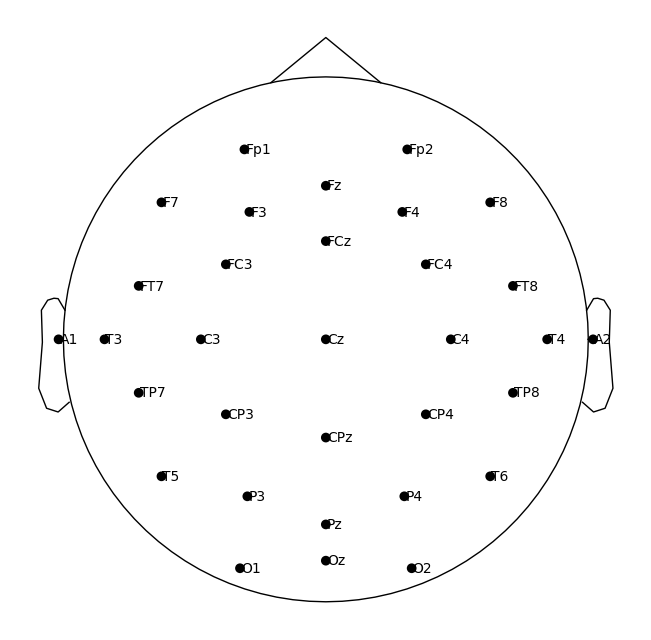

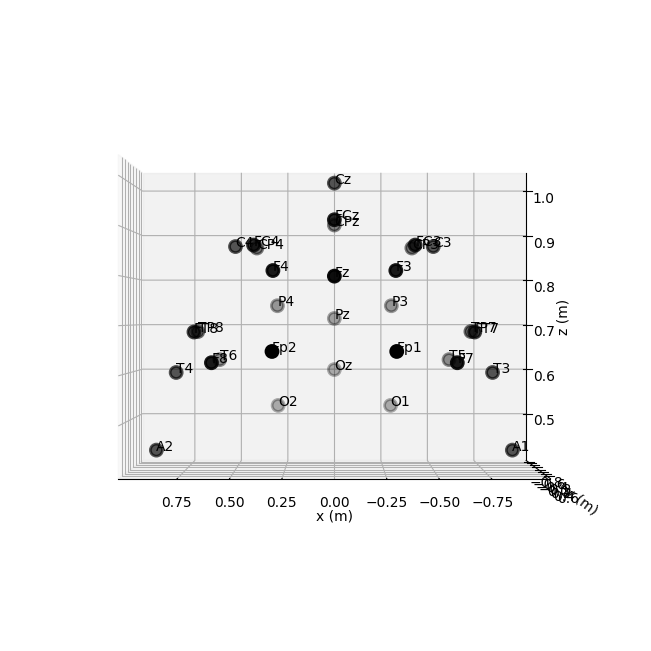

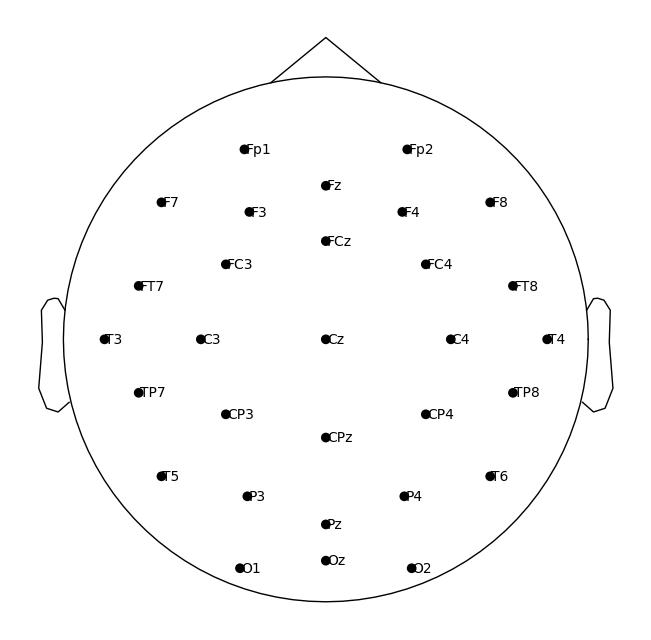

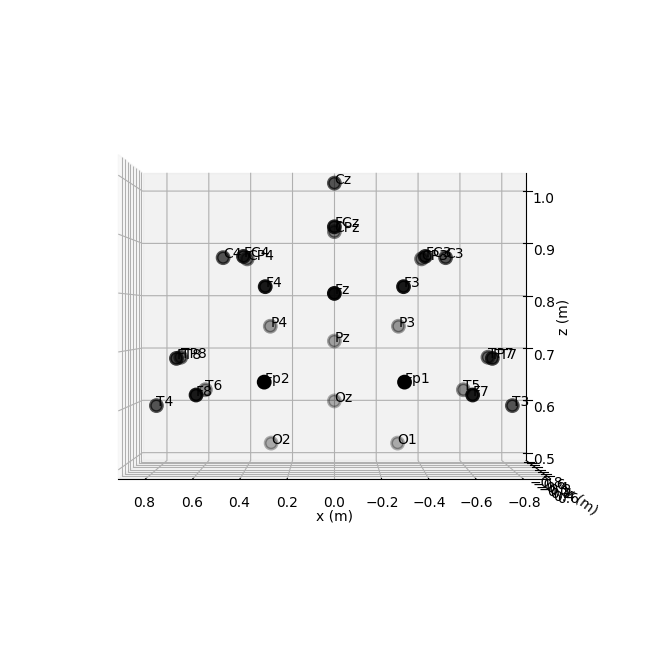

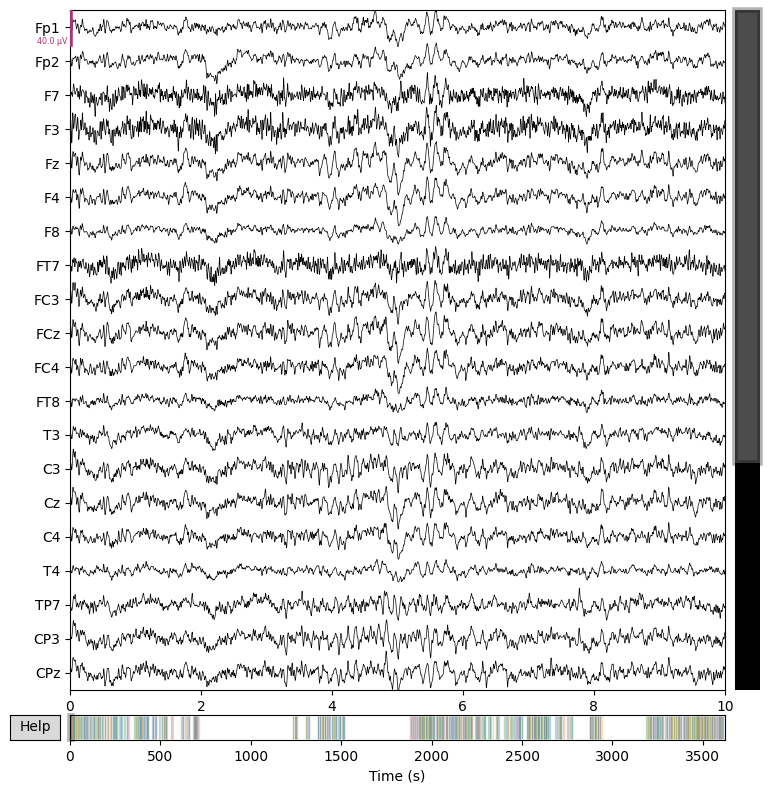

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
Overwriting existing file.
Writing /content/preprocessed_raw.fif
Closing /content/preprocessed_raw.fif
[done]
Preprocessed data saved to /content/preprocessed_raw.fif


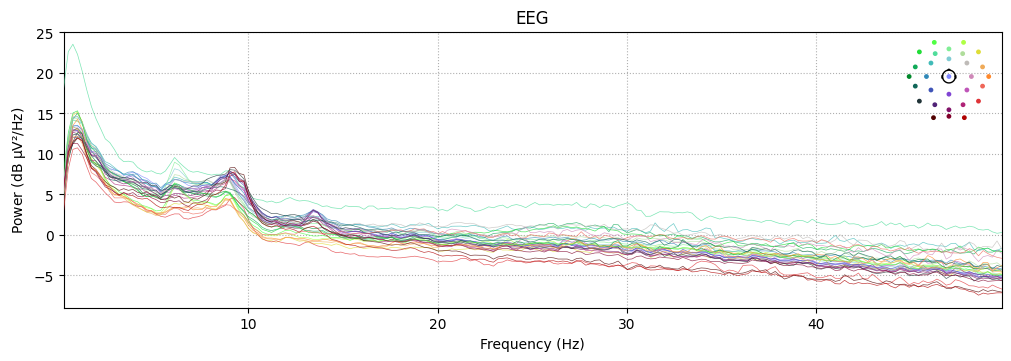

In [ ]:
import mne
import numpy as np
from mne.channels import make_dig_montage

# Define the custom montage positions
electrode_positions = {
    'Fp1': [-0.3,  0.7,  0.648],
    'Fp2': [ 0.3,  0.7,  0.648],
    'F7':  [-0.6,  0.5,  0.624],
    'F3':  [-0.3,  0.5,  0.812],
    'Fz':  [ 0.0,  0.6,  0.8],
    'F4':  [ 0.3,  0.5,  0.812],
    'F8':  [ 0.6,  0.5,  0.624],
    'FT7': [-0.7,  0.2,  0.686],
    'FC3': [-0.4,  0.3,  0.866],
    'FCz': [ 0.0,  0.4,  0.917],
    'FC4': [ 0.4,  0.3,  0.866],
    'FT8': [ 0.7,  0.2,  0.686],
    'T3':  [-0.8,  0.0,  0.6],
    'C3':  [-0.5,  0.0,  0.866],
    'Cz':  [ 0.0,  0.0,  1.0],
    'C4':  [ 0.5,  0.0,  0.866],
    'T4':  [ 0.8,  0.0,  0.6],
    'TP7': [-0.7, -0.2,  0.686],
    'CP3': [-0.4, -0.3,  0.866],
    'CPz': [ 0.0, -0.4,  0.917],
    'CP4': [ 0.4, -0.3,  0.866],
    'TP8': [ 0.7, -0.2,  0.686],
    'T5':  [-0.6, -0.5,  0.624],
    'P3':  [-0.3, -0.6,  0.742],
    'Pz':  [ 0.0, -0.7,  0.714],
    'P4':  [ 0.3, -0.6,  0.742],
    'T6':  [ 0.6, -0.5,  0.624],
    'O1':  [-0.3, -0.8,  0.52 ],
    'Oz':  [ 0.0, -0.8,  0.6  ],
    'O2':  [ 0.3, -0.8,  0.52 ],
    'A1':  [-0.9,  0.0,  0.436],
    'A2':  [ 0.9,  0.0,  0.436]
}

# Create the montage
montage = make_dig_montage(ch_pos=electrode_positions, coord_frame='head')

# Path to the .set file
set_file_path = "/content/output/s01_051017m.set/s01_051017m.set/s01_051017m.set"

# Load the EEG dataset
try:
    raw = mne.io.read_raw_eeglab(set_file_path, preload=True)
    print("File loaded successfully!")
except Exception as e:
    print(f"Error loading file: {e}")
    exit()

# Rename channels to match the montage
rename_mapping = {
    'FP1': 'Fp1', 'FP2': 'Fp2', 'FZ': 'Fz', 'FCZ': 'FCz',
    'CZ': 'Cz', 'CPZ': 'CPz', 'PZ': 'Pz', 'OZ': 'Oz'
}
try:
    raw.rename_channels(rename_mapping)
    print("Channel names standardized successfully!")
except Exception as e:
    print(f"Error renaming channels: {e}")

# Apply the montage
try:
    raw.set_montage(montage, on_missing='ignore')
    print("Montage set successfully!")
except Exception as e:
    print(f"Error setting montage: {e}")

# Adjust sphere size for visualization
sphere_radius = 0.7

# Plot the montage
montage.plot(kind='topomap', sphere=(0, 0, 0, sphere_radius), show=True)
montage.plot(kind='3d', sphere=(0, 0, 0, sphere_radius), show=True)

# Plot the sensors
raw.plot_sensors(kind='topomap', show_names=True, sphere=(0, 0, 0, sphere_radius))
raw.plot_sensors(kind='3d', show_names=True, sphere=(0, 0, 0, sphere_radius))

# Visualize raw data
try:
    raw.plot(title="EEG Data Visualization", block=True)
except Exception as e:
    print(f"Error plotting raw data: {e}")

# Compute and visualize PSD
try:
    psd = raw.compute_psd(fmin=0.1, fmax=50)
    psd.plot(show=True)
except Exception as e:
    print(f"Error computing or plotting PSD: {e}")

# Save preprocessed data (optional)
output_file = "/content/preprocessed_raw.fif"
try:
    raw.save(output_file, overwrite=True)
    print(f"Preprocessed data saved to {output_file}")
except Exception as e:
    print(f"Error saving preprocessed data: {e}")


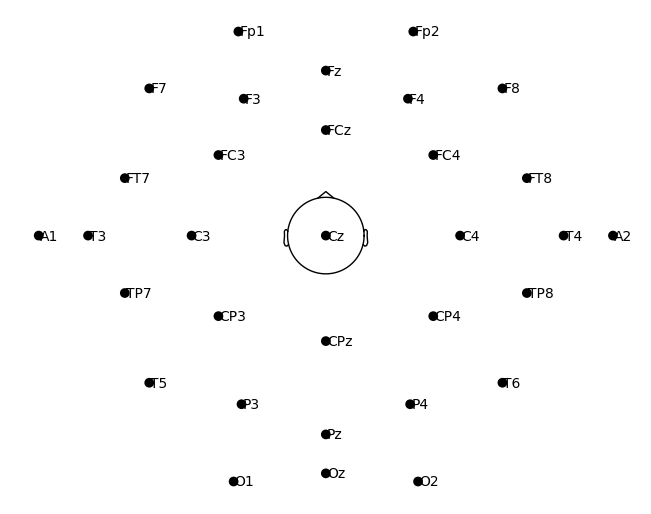

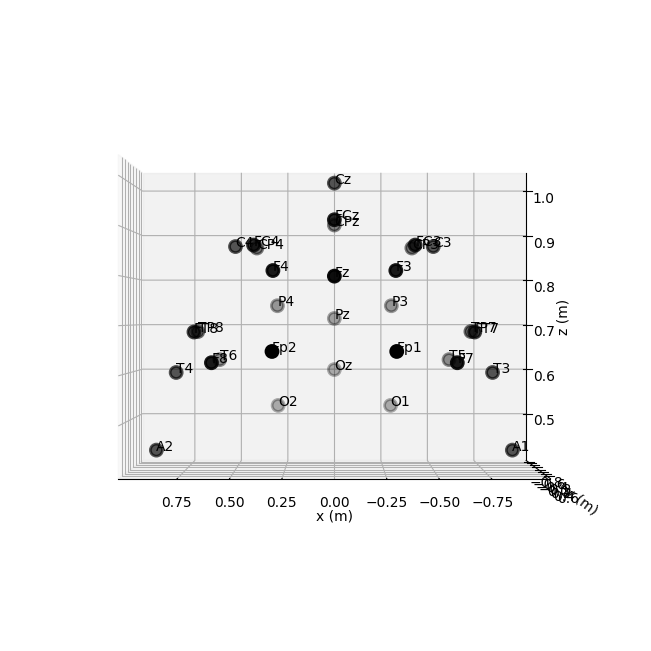

Reading /content/output/s01_051017m.set/s01_051017m.set/s01_051017m.fdt
Reading 0 ... 1811359  =      0.000 ...  3622.718 secs...


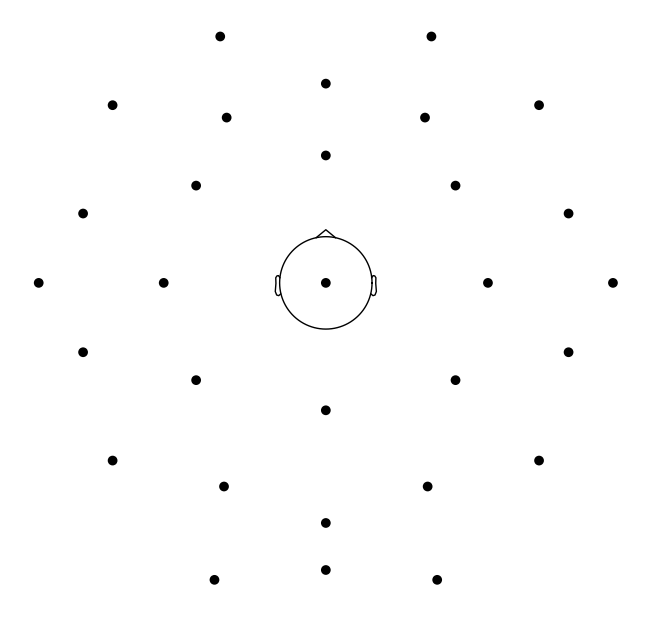

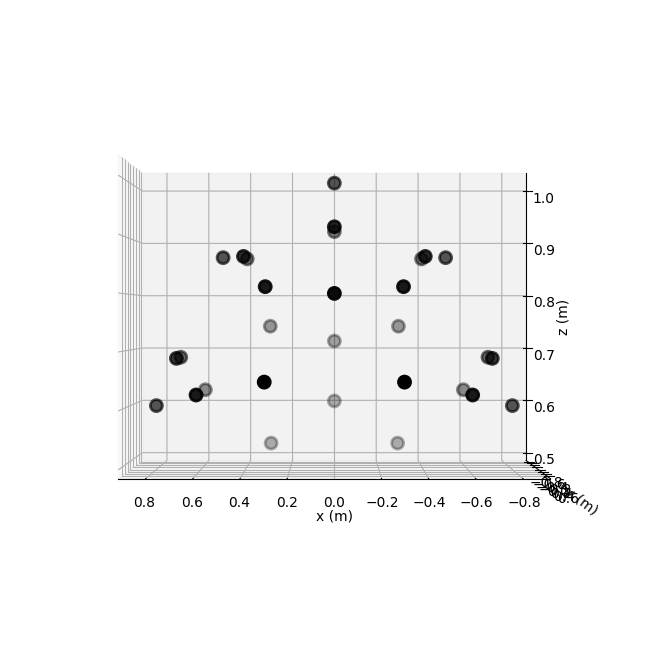

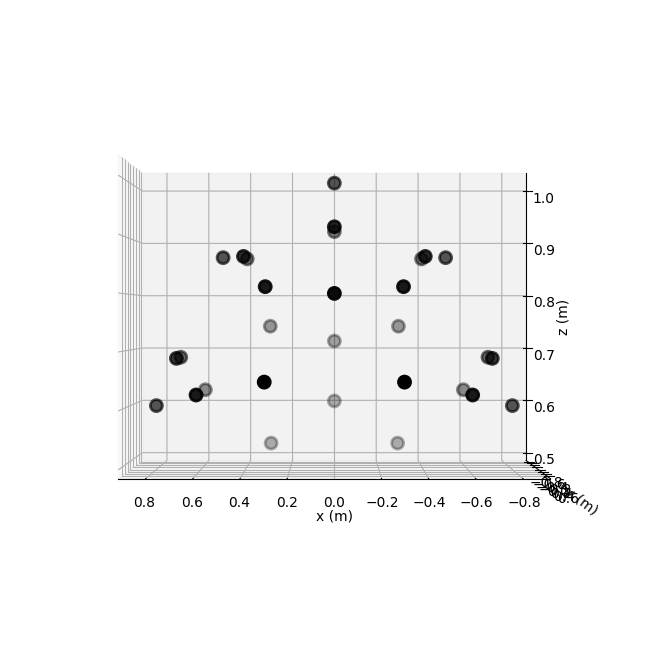

In [ ]:
import numpy as np
import mne

# Define electrode positions
electrode_positions = {
    'Fp1': [-0.3, 0.7, 0.648],
    'Fp2': [0.3, 0.7, 0.648],
    'F7': [-0.6, 0.5, 0.624],
    'F3': [-0.3, 0.5, 0.812],
    'Fz': [0.0, 0.6, 0.8],
    'F4': [0.3, 0.5, 0.812],
    'F8': [0.6, 0.5, 0.624],
    'FT7': [-0.7, 0.2, 0.686],
    'FC3': [-0.4, 0.3, 0.866],
    'FCz': [0.0, 0.4, 0.917],
    'FC4': [0.4, 0.3, 0.866],
    'FT8': [0.7, 0.2, 0.686],
    'T3': [-0.8, 0.0, 0.6],
    'C3': [-0.5, 0.0, 0.866],
    'Cz': [0.0, 0.0, 1.0],
    'C4': [0.5, 0.0, 0.866],
    'T4': [0.8, 0.0, 0.6],
    'TP7': [-0.7, -0.2, 0.686],
    'CP3': [-0.4, -0.3, 0.866],
    'CPz': [0.0, -0.4, 0.917],
    'CP4': [0.4, -0.3, 0.866],
    'TP8': [0.7, -0.2, 0.686],
    'T5': [-0.6, -0.5, 0.624],
    'P3': [-0.3, -0.6, 0.742],
    'Pz': [0.0, -0.7, 0.714],
    'P4': [0.3, -0.6, 0.742],
    'T6': [0.6, -0.5, 0.624],
    'O1': [-0.3, -0.8, 0.52],
    'Oz': [0.0, -0.8, 0.6],
    'O2': [0.3, -0.8, 0.52],
    'A1': [-0.9, 0.0, 0.436],
    'A2': [0.9, 0.0, 0.436],
}

# Create the montage
montage = mne.channels.make_dig_montage(
    ch_pos=electrode_positions,
    coord_frame='head'
)

# Plot the montage
montage.plot(kind='topomap', show=True)
montage.plot(kind='3d', show=True)

# Load the raw EEG data
raw_file_path = "/content/output/s01_051017m.set/s01_051017m.set/s01_051017m.set"
raw = mne.io.read_raw_eeglab(raw_file_path, preload=True)

# Align channel names
raw.rename_channels(
    {
        'FP1': 'Fp1',
        'FP2': 'Fp2',
        'FZ': 'Fz',
        'FCZ': 'FCz',
        'CZ': 'Cz',
        'CPZ': 'CPz',
        'PZ': 'Pz',
        'OZ': 'Oz',
    }
)

# Set the montage with missing channels ignored
raw.set_montage(montage, on_missing='ignore')

# Plot the raw data with the montage applied
raw.plot_sensors(kind='topomap', show=True)
raw.plot_sensors(kind='3d', show=True)


Reading /content/output/s01_051017m.set/s01_051017m.set/s01_051017m.fdt
Reading 0 ... 1811359  =      0.000 ...  3622.718 secs...


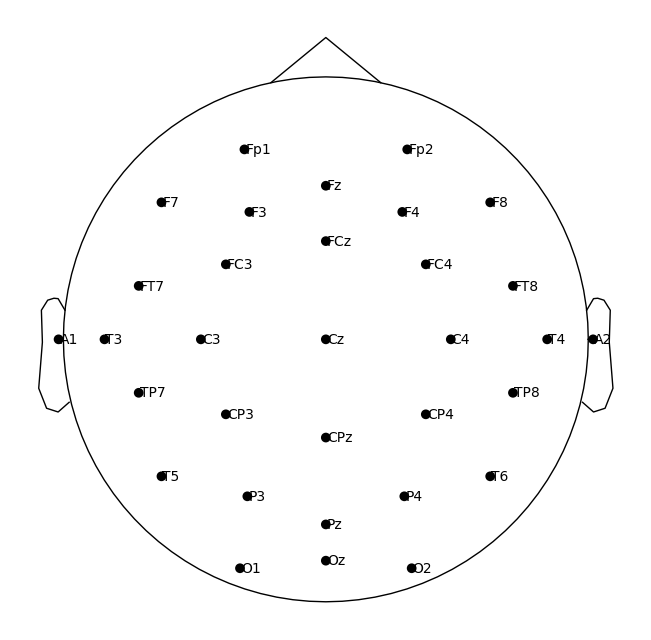

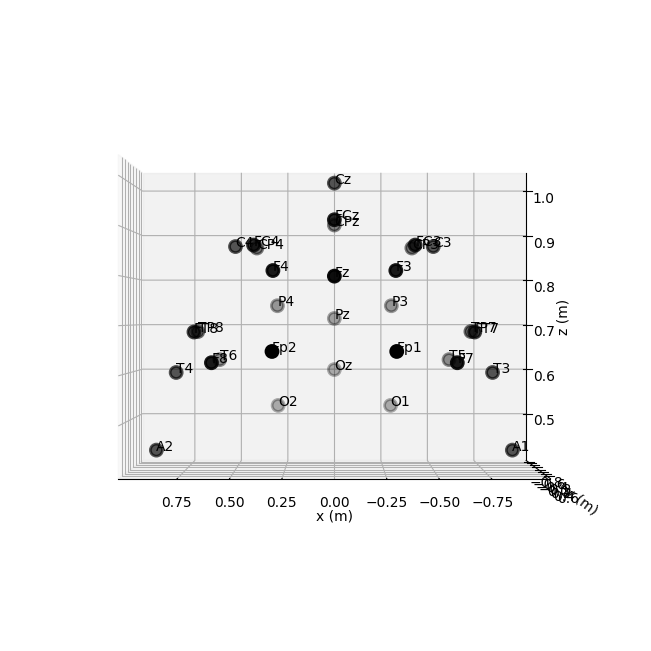

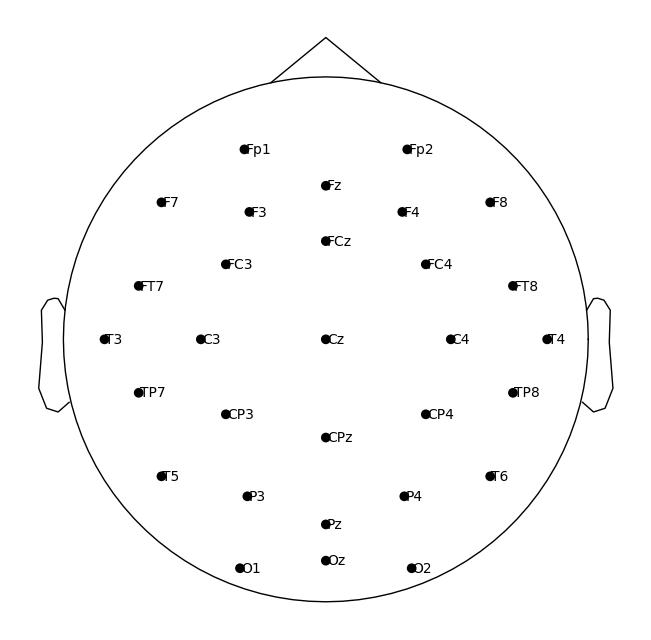

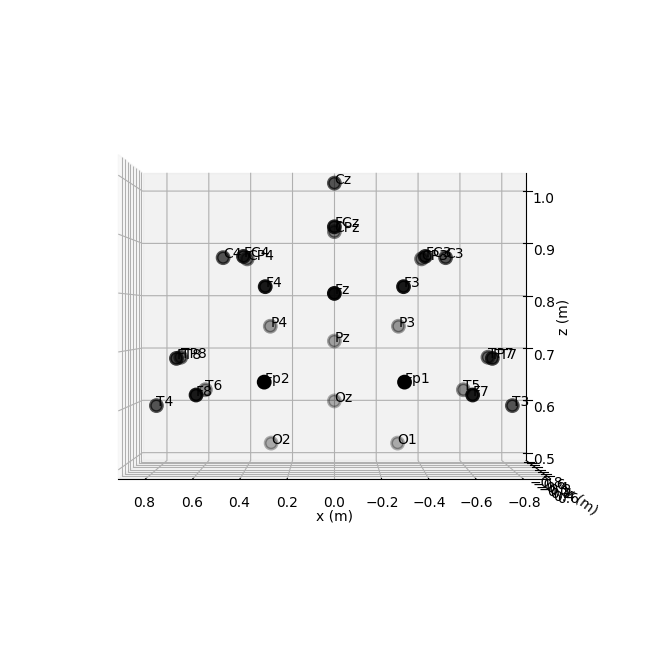

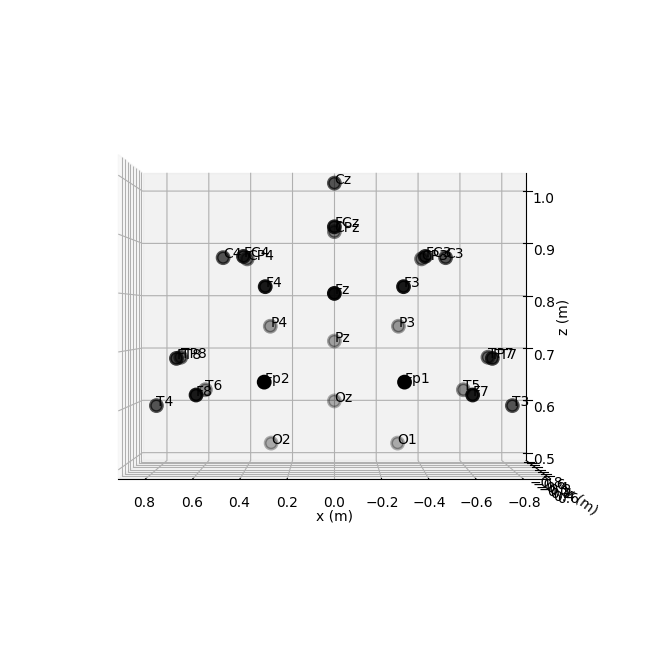

In [ ]:
import mne
import numpy as np

# Define the custom montage positions
electrode_positions = {
    'Fp1': [-0.3,  0.7,  0.648],
    'Fp2': [ 0.3,  0.7,  0.648],
    'F7':  [-0.6,  0.5,  0.624],
    'F3':  [-0.3,  0.5,  0.812],
    'Fz':  [ 0.0,  0.6,  0.8],
    'F4':  [ 0.3,  0.5,  0.812],
    'F8':  [ 0.6,  0.5,  0.624],
    'FT7': [-0.7,  0.2,  0.686],
    'FC3': [-0.4,  0.3,  0.866],
    'FCz': [ 0.0,  0.4,  0.917],
    'FC4': [ 0.4,  0.3,  0.866],
    'FT8': [ 0.7,  0.2,  0.686],
    'T3':  [-0.8,  0.0,  0.6],
    'C3':  [-0.5,  0.0,  0.866],
    'Cz':  [ 0.0,  0.0,  1.0],
    'C4':  [ 0.5,  0.0,  0.866],
    'T4':  [ 0.8,  0.0,  0.6],
    'TP7': [-0.7, -0.2,  0.686],
    'CP3': [-0.4, -0.3,  0.866],
    'CPz': [ 0.0, -0.4,  0.917],
    'CP4': [ 0.4, -0.3,  0.866],
    'TP8': [ 0.7, -0.2,  0.686],
    'T5':  [-0.6, -0.5,  0.624],
    'P3':  [-0.3, -0.6,  0.742],
    'Pz':  [ 0.0, -0.7,  0.714],
    'P4':  [ 0.3, -0.6,  0.742],
    'T6':  [ 0.6, -0.5,  0.624],
    'O1':  [-0.3, -0.8,  0.52 ],
    'Oz':  [ 0.0, -0.8,  0.6  ],
    'O2':  [ 0.3, -0.8,  0.52 ],
    'A1':  [-0.9,  0.0,  0.436],
    'A2':  [ 0.9,  0.0,  0.436]
}

# Create the montage
montage = mne.channels.make_dig_montage(ch_pos=electrode_positions, coord_frame='head')

# Load the EEG data
raw_file_path = "/content/output/s01_051017m.set/s01_051017m.set/s01_051017m.set"
raw = mne.io.read_raw_eeglab(raw_file_path, preload=True)

# Rename channels in the raw data to match the montage
raw.rename_channels({
    'FP1': 'Fp1', 'FP2': 'Fp2', 'FZ': 'Fz', 'FCZ': 'FCz', 'CZ': 'Cz',
    'CPZ': 'CPz', 'PZ': 'Pz', 'OZ': 'Oz'
})

# Apply the montage
raw.set_montage(montage, on_missing='ignore')

# Adjust the sphere size for proper visualization
sphere_radius = 0.7  # Adjusted to make the head larger
fig = montage.plot(kind='topomap', sphere=(0, 0, 0, sphere_radius), show=True)
fig.set_size_inches(8, 8)

# Plot the montage in 3D with the adjusted sphere size
fig_3d = montage.plot(kind='3d', sphere=(0, 0, 0, sphere_radius), show=True)
fig_3d.set_size_inches(8, 8)

# Plot the raw data sensors with the montage applied
raw.plot_sensors(kind='topomap', show_names=True, sphere=(0, 0, 0, sphere_radius))
raw.plot_sensors(kind='3d', show_names=True, sphere=(0, 0, 0, sphere_radius))


In [ ]:
import os
import zipfile
import mne
import numpy as np

# Paths to dataset and output directories
dataset_dir = "/content/drive/MyDrive/eeg_data/extracted"  # Path containing all the zip files
output_dir = "/content/output"  # Output directory for processed files
os.makedirs(output_dir, exist_ok=True)

# Iterate through all zip files in the dataset directory
for zip_file in os.listdir(dataset_dir):
    if zip_file.endswith(".zip"):
        zip_path = os.path.join(dataset_dir, zip_file)

        # Extract the zip file
        extract_path = os.path.join(output_dir, zip_file.replace('.zip', ''))
        os.makedirs(extract_path, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as z:
            z.extractall(extract_path)

        # Locate the inner folder containing the .set file
        extracted_folders = os.listdir(extract_path)
        if len(extracted_folders) != 1 or not os.path.isdir(os.path.join(extract_path, extracted_folders[0])):
            print(f"Unexpected structure in {zip_file}. Skipping.")
            continue

        inner_folder = os.path.join(extract_path, extracted_folders[0])

        # Locate the .set file
        set_file = next((f for f in os.listdir(inner_folder) if f.endswith('.set')), None)
        if not set_file:
            print(f"No .set file found in {zip_file}. Skipping.")
            continue

        set_file_path = os.path.join(inner_folder, set_file)

        # Load the EEG dataset using MNE
        try:
            raw = mne.io.read_raw_eeglab(set_file_path, preload=True)
            print(f"\nLoaded {set_file} successfully!")

            # Extract annotations and event information
            print("\n### Annotations ###")
            annotations = raw.annotations
            for i, annotation in enumerate(annotations):
                print(f"Annotation {i}: Description={annotation['description']}, Onset={annotation['onset']}, Duration={annotation['duration']}")

            # Convert annotations to events
            events, event_id = mne.events_from_annotations(raw)
            print("\n### Event IDs ###")
            print(event_id)

            # Check manually parsed events
            manually_parsed_events = []
            for annotation in annotations:
                if annotation['description'] in ['251', '252']:
                    onset_sample = int(annotation['onset'] * raw.info['sfreq'])
                    event_code = int(annotation['description'])
                    manually_parsed_events.append([onset_sample, 0, event_code])

            manually_parsed_events = np.array(manually_parsed_events)
            print("\n### Manually Parsed Events ###")
            print(manually_parsed_events)

            # Separate events based on their descriptions
            left_events = events[events[:, 2] == event_id.get('251', -1)]  # Left events
            right_events = events[events[:, 2] == event_id.get('252', -1)]  # Right events

            print(f"\n### Debugging Filtered Events ###")
            print(f"Left events: {len(left_events)}")
            print(f"Right events: {len(right_events)}")

            # Save the events as .npy files
            base_name = os.path.splitext(set_file)[0]
            left_output_path = os.path.join(output_dir, f"{base_name}_left.npy")
            right_output_path = os.path.join(output_dir, f"{base_name}_right.npy")
            np.save(left_output_path, left_events)
            np.save(right_output_path, right_events)

            print(f"Processed {set_file}: {len(left_events)} left events, {len(right_events)} right events")

        except Exception as e:
            print(f"Error processing {set_file}: {e}")

print("\nProcessing complete.")


Streaming output truncated to the last 5000 lines.
Annotation 119: Description=254, Onset=359.504, Duration=0.0
Annotation 120: Description=251, Onset=367.26, Duration=0.0
Annotation 121: Description=253, Onset=368.196, Duration=0.0
Annotation 122: Description=254, Onset=370.272, Duration=0.0
Annotation 123: Description=251, Onset=378.912, Duration=0.0
Annotation 124: Description=253, Onset=379.932, Duration=0.0
Annotation 125: Description=254, Onset=382.004, Duration=0.0
Annotation 126: Description=252, Onset=389.66, Duration=0.0
Annotation 127: Description=253, Onset=390.564, Duration=0.0
Annotation 128: Description=254, Onset=392.152, Duration=0.0
Annotation 129: Description=251, Onset=399.54, Duration=0.0
Annotation 130: Description=253, Onset=400.376, Duration=0.0
Annotation 131: Description=254, Onset=402.132, Duration=0.0
Annotation 132: Description=251, Onset=409.924, Duration=0.0
Annotation 133: Description=253, Onset=410.776, Duration=0.0
Annotation 134: Description=254, Onse

KeyboardInterrupt: 

In [ ]:
import os
import zipfile
import mne
import numpy as np
import logging
from tqdm import tqdm

# Setup logging
log_file = "processing_log.txt"
logging.basicConfig(filename=log_file, level=logging.INFO, format='%(asctime)s - %(message)s')
logging.info("Starting EEG processing.")

# Paths to dataset and output directories
dataset_dir = "/content/drive/MyDrive/eeg_data/extracted"  # Path containing all the zip files
output_dir = "/content/drive/MyDrive/EEGOut"  # Output directory for processed files
os.makedirs(output_dir, exist_ok=True)

# Get list of zip files
zip_files = [f for f in os.listdir(dataset_dir) if f.endswith(".zip")]

# Iterate through all zip files with a progress bar
for zip_file in tqdm(zip_files, desc="Processing files"):
    zip_path = os.path.join(dataset_dir, zip_file)

    # Extract the zip file
    extract_path = os.path.join(output_dir, zip_file.replace('.zip', ''))
    os.makedirs(extract_path, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(extract_path)

    # Locate the inner folder containing the .set file
    extracted_folders = os.listdir(extract_path)
    if len(extracted_folders) != 1 or not os.path.isdir(os.path.join(extract_path, extracted_folders[0])):
        logging.warning(f"Unexpected structure in {zip_file}. Skipping.")
        continue

    inner_folder = os.path.join(extract_path, extracted_folders[0])

    # Locate the .set file
    set_file = next((f for f in os.listdir(inner_folder) if f.endswith('.set')), None)
    if not set_file:
        logging.warning(f"No .set file found in {zip_file}. Skipping.")
        continue

    set_file_path = os.path.join(inner_folder, set_file)

    # Load the EEG dataset using MNE
    try:
        raw = mne.io.read_raw_eeglab(set_file_path, preload=True)
        logging.info(f"Loaded {set_file} successfully.")

        # Extract annotations and event information
        annotations = raw.annotations
        events, event_id = mne.events_from_annotations(raw)

        # Check manually parsed events
        manually_parsed_events = []
        for annotation in annotations:
            if annotation['description'] in ['251', '252']:
                onset_sample = int(annotation['onset'] * raw.info['sfreq'])
                event_code = int(annotation['description'])
                manually_parsed_events.append([onset_sample, 0, event_code])

        manually_parsed_events = np.array(manually_parsed_events)

        # Separate events based on their descriptions
        left_events = events[events[:, 2] == event_id.get('251', -1)]  # Left events
        right_events = events[events[:, 2] == event_id.get('252', -1)]  # Right events

        # Save the events as .npy files
        base_name = os.path.splitext(set_file)[0]
        left_output_path = os.path.join(output_dir, f"{base_name}_left.npy")
        right_output_path = os.path.join(output_dir, f"{base_name}_right.npy")
        np.save(left_output_path, left_events)
        np.save(right_output_path, right_events)

        logging.info(f"Processed {set_file}: {len(left_events)} left events, {len(right_events)} right events.")

    except Exception as e:
        logging.error(f"Error processing {set_file}: {e}")

logging.info("Processing complete.")
print("\nProcessing complete. Check the log file for details.")


Processing files:   0%|          | 0/62 [00:00<?, ?it/s]

Reading /content/drive/MyDrive/EEGOut/s50_080731m.set/s50_080731m.set/s50_080731m.fdt
Reading 0 ... 1814759  =      0.000 ...  3629.518 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:   2%|▏         | 1/62 [00:09<09:43,  9.57s/it]

Reading /content/drive/MyDrive/EEGOut/s44_070325n.set/s44_070325n.set/s44_070325n.fdt
Reading 0 ... 3102199  =      0.000 ...  6204.398 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:   3%|▎         | 2/62 [00:21<10:41, 10.69s/it]

Reading /content/drive/MyDrive/EEGOut/s01_051017m.set/s01_051017m.set/s01_051017m.fdt
Reading 0 ... 1811359  =      0.000 ...  3622.718 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:   5%|▍         | 3/62 [00:29<09:31,  9.68s/it]

Reading /content/drive/MyDrive/EEGOut/s53_081018n.set/s53_081018n.set/s53_081018n.fdt
Reading 0 ... 1837779  =      0.000 ...  3675.558 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:   6%|▋         | 4/62 [00:37<08:37,  8.92s/it]

Reading /content/drive/MyDrive/EEGOut/s43_070208n.set/s43_070208n.set/s43_070208n.fdt
Reading 0 ... 2911699  =      0.000 ...  5823.398 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:   8%|▊         | 5/62 [00:50<09:59, 10.52s/it]

Reading /content/drive/MyDrive/EEGOut/s55_090930n.set/s55_090930n.set/s55_090930n.fdt
Reading 0 ... 2705919  =      0.000 ...  5411.838 secs...
Used Annotations descriptions: ['251', '252', '253', '254', '255']


Processing files:  10%|▉         | 6/62 [01:06<11:39, 12.50s/it]

Reading /content/drive/MyDrive/EEGOut/s45_070307n.set/s45_070307n.set/s45_070307n.fdt
Reading 0 ... 3267559  =      0.000 ...  6535.118 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  11%|█▏        | 7/62 [01:20<11:41, 12.76s/it]

Reading /content/drive/MyDrive/EEGOut/s45_070321n.set/s45_070321n.set/s45_070321n.fdt
Reading 0 ... 2994979  =      0.000 ...  5989.958 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  13%|█▎        | 8/62 [01:27<09:57, 11.06s/it]

Reading /content/drive/MyDrive/EEGOut/s41_061225n.set/s41_061225n.set/s41_061225n.fdt
Reading 0 ... 3176659  =      0.000 ...  6353.318 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  15%|█▍        | 9/62 [01:40<10:12, 11.55s/it]

Reading /content/drive/MyDrive/EEGOut/s53_090918n.set/s53_090918n.set/s53_090918n.fdt
Reading 0 ... 2721679  =      0.000 ...  5443.358 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  16%|█▌        | 10/62 [01:51<09:49, 11.34s/it]

Reading /content/drive/MyDrive/EEGOut/s01_060926_1n.set/s01_060926_1n.set/s01_060926_1n.fdt
Reading 0 ... 2180519  =      0.000 ...  4361.038 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  18%|█▊        | 11/62 [02:00<09:07, 10.74s/it]

Reading /content/drive/MyDrive/EEGOut/s02_050921m.set/s02_050921m.set/s02_050921m.fdt
Reading 0 ... 1814959  =      0.000 ...  3629.918 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  19%|█▉        | 12/62 [02:07<08:01,  9.64s/it]

Reading /content/drive/MyDrive/EEGOut/s31_061020m.set/s31_061020m.set/s31_061020m.fdt
Reading 0 ... 3530519  =      0.000 ...  7061.038 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  21%|██        | 13/62 [02:21<08:55, 10.93s/it]

Reading /content/drive/MyDrive/EEGOut/s40_070124n.set/s40_070124n.set/s40_070124n.fdt
Reading 0 ... 3233479  =      0.000 ...  6466.958 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  23%|██▎       | 14/62 [02:35<09:32, 11.92s/it]

Reading /content/drive/MyDrive/EEGOut/s14_060319n.set/s14_060319n.set/s14_060319n.fdt
Reading 0 ... 1639379  =      0.000 ...  3278.758 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  24%|██▍       | 15/62 [02:44<08:37, 11.01s/it]

Reading /content/drive/MyDrive/EEGOut/s09_060313n.set/s09_060313n.set/s09_060313n.fdt
Reading 0 ... 1948059  =      0.000 ...  3896.118 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  26%|██▌       | 16/62 [02:51<07:29,  9.76s/it]

Reading /content/drive/MyDrive/EEGOut/s44_070126m.set/s44_070126m.set/s44_070126m.fdt
Reading 0 ... 3122779  =      0.000 ...  6245.558 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  27%|██▋       | 17/62 [03:03<07:42, 10.27s/it]

Reading /content/drive/MyDrive/EEGOut/s09_060317n.set/s09_060317n.set/s09_060317n.fdt
Reading 0 ... 1309279  =      0.000 ...  2618.558 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  29%|██▉       | 18/62 [03:08<06:28,  8.83s/it]

Reading /content/drive/MyDrive/EEGOut/s22_090825n.set/s22_090825n.set/s22_090825n.fdt
Reading 0 ... 2882679  =      0.000 ...  5765.358 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  31%|███       | 19/62 [03:19<06:49,  9.53s/it]

Reading /content/drive/MyDrive/EEGOut/s49_080602m.set/s49_080602m.set/s49_080602m.fdt
Reading 0 ... 1813619  =      0.000 ...  3627.238 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  32%|███▏      | 20/62 [03:29<06:41,  9.57s/it]

Reading /content/drive/MyDrive/EEGOut/s05_061019m.set/s05_061019m.set/s05_061019m.fdt
Reading 0 ... 3157759  =      0.000 ...  6315.518 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  34%|███▍      | 21/62 [03:42<07:11, 10.52s/it]

Reading /content/drive/MyDrive/EEGOut/s05_051120m.set/s05_051120m.set/s05_051120m.fdt
Reading 0 ... 1878659  =      0.000 ...  3757.318 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  35%|███▌      | 22/62 [03:49<06:26,  9.65s/it]

Reading /content/drive/MyDrive/EEGOut/s43_070202m.set/s43_070202m.set/s43_070202m.fdt
Reading 0 ... 3266619  =      0.000 ...  6533.238 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  37%|███▋      | 23/62 [04:01<06:47, 10.44s/it]

Reading /content/drive/MyDrive/EEGOut/s04_051130m.set/s04_051130m.set/s04_051130m.fdt
Reading 0 ... 1878659  =      0.000 ...  3757.318 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  39%|███▊      | 24/62 [04:11<06:30, 10.27s/it]

Reading /content/drive/MyDrive/EEGOut/s05_060308n.set/s05_060308n.set/s05_060308n.fdt
Reading 0 ... 1848339  =      0.000 ...  3696.678 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  40%|████      | 25/62 [04:21<06:17, 10.20s/it]

Reading /content/drive/MyDrive/EEGOut/s54_081226m.set/s54_081226m.set/s54_081226m.fdt
Reading 0 ... 1230519  =      0.000 ...  2461.038 secs...
Used Annotations descriptions: ['251', '252', '253', '254', '255']


Processing files:  42%|████▏     | 26/62 [04:27<05:16,  8.79s/it]

Reading /content/drive/MyDrive/EEGOut/s43_070205n.set/s43_070205n.set/s43_070205n.fdt
Reading 0 ... 3287919  =      0.000 ...  6575.838 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  44%|████▎     | 27/62 [04:41<06:06, 10.46s/it]

Reading /content/drive/MyDrive/EEGOut/s49_080522n.set/s49_080522n.set/s49_080522n.fdt
Reading 0 ... 1511059  =      0.000 ...  3022.118 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  45%|████▌     | 28/62 [04:47<05:12,  9.19s/it]

Reading /content/drive/MyDrive/EEGOut/s12_060710_2m.set/s12_060710_2m.set/s12_060710_2m.fdt
Reading 0 ... 2105559  =      0.000 ...  4211.118 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  47%|████▋     | 29/62 [04:56<04:55,  8.95s/it]

Reading /content/drive/MyDrive/EEGOut/s02_051115m.set/s02_051115m.set/s02_051115m.fdt
Reading 0 ... 1916739  =      0.000 ...  3833.478 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  48%|████▊     | 30/62 [05:08<05:12,  9.78s/it]

Reading /content/drive/MyDrive/EEGOut/s13_060213m.set/s13_060213m.set/s13_060213m.fdt
Reading 0 ... 1917179  =      0.000 ...  3834.358 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  50%|█████     | 31/62 [05:18<05:08,  9.95s/it]

Reading /content/drive/MyDrive/EEGOut/s22_080513m.set/s22_080513m.set/s22_080513m.fdt
Reading 0 ... 1950079  =      0.000 ...  3900.158 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  52%|█████▏    | 32/62 [05:26<04:44,  9.49s/it]

Reading /content/drive/MyDrive/EEGOut/s35_070115m.set/s35_070115m.set/s35_070115m.fdt
Reading 0 ... 3257579  =      0.000 ...  6515.158 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  53%|█████▎    | 33/62 [05:41<05:17, 10.94s/it]

Reading /content/drive/MyDrive/EEGOut/s31_061103n.set/s31_061103n.set/s31_061103n.fdt
Reading 0 ... 3115539  =      0.000 ...  6231.078 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  55%|█████▍    | 34/62 [05:56<05:41, 12.20s/it]

Reading /content/drive/MyDrive/EEGOut/s50_080725n.set/s50_080725n.set/s50_080725n.fdt
Reading 0 ... 1849379  =      0.000 ...  3698.758 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  56%|█████▋    | 35/62 [06:04<04:56, 10.97s/it]

Reading /content/drive/MyDrive/EEGOut/s35_070322n.set/s35_070322n.set/s35_070322n.fdt
Reading 0 ... 2983999  =      0.000 ...  5967.998 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  58%|█████▊    | 36/62 [06:16<04:52, 11.24s/it]

Reading /content/drive/MyDrive/EEGOut/s22_090922m.set/s22_090922m.set/s22_090922m.fdt
Reading 0 ... 2749539  =      0.000 ...  5499.078 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  60%|█████▉    | 37/62 [06:30<05:03, 12.14s/it]

Reading /content/drive/MyDrive/EEGOut/s23_060711_1m.set/s23_060711_1m.set/s23_060711_1m.fdt
Reading 0 ... 2110419  =      0.000 ...  4220.838 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  61%|██████▏   | 38/62 [06:38<04:18, 10.76s/it]

Reading /content/drive/MyDrive/EEGOut/s48_080501n.set/s48_080501n.set/s48_080501n.fdt
Reading 0 ... 1808559  =      0.000 ...  3617.118 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  63%|██████▎   | 39/62 [06:47<03:55, 10.23s/it]

Reading /content/drive/MyDrive/EEGOut/s42_061229n.set/s42_061229n.set/s42_061229n.fdt
Reading 0 ... 1344039  =      0.000 ...  2688.078 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  65%|██████▍   | 40/62 [06:51<03:10,  8.65s/it]

Reading /content/drive/MyDrive/EEGOut/s12_060710_1m.set/s12_060710_1m.set/s12_060710_1m.fdt
Reading 0 ... 2117619  =      0.000 ...  4235.238 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  66%|██████▌   | 41/62 [07:01<03:09,  9.02s/it]

Reading /content/drive/MyDrive/EEGOut/s40_070131m.set/s40_070131m.set/s40_070131m.fdt
Reading 0 ... 3281099  =      0.000 ...  6562.198 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  68%|██████▊   | 42/62 [07:16<03:32, 10.61s/it]

Reading /content/drive/MyDrive/EEGOut/s41_091104n.set/s41_091104n.set/s41_091104n.fdt
Reading 0 ... 2721899  =      0.000 ...  5443.798 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  69%|██████▉   | 43/62 [07:26<03:21, 10.61s/it]

Reading /content/drive/MyDrive/EEGOut/s14_060319m.set/s14_060319m.set/s14_060319m.fdt
Reading 0 ... 1427059  =      0.000 ...  2854.118 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  71%|███████   | 44/62 [07:36<03:03, 10.22s/it]

Reading /content/drive/MyDrive/EEGOut/s01_060926_2n.set/s01_060926_2n.set/s01_060926_2n.fdt
Reading 0 ... 1927019  =      0.000 ...  3854.038 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  73%|███████▎  | 45/62 [07:45<02:48,  9.91s/it]

Reading /content/drive/MyDrive/EEGOut/s53_090925m.set/s53_090925m.set/s53_090925m.fdt
Reading 0 ... 2707599  =      0.000 ...  5415.198 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  74%|███████▍  | 46/62 [07:57<02:50, 10.67s/it]

Reading /content/drive/MyDrive/EEGOut/s06_051119m.set/s06_051119m.set/s06_051119m.fdt
Reading 0 ... 1836479  =      0.000 ...  3672.958 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  76%|███████▌  | 47/62 [08:05<02:24,  9.65s/it]

Reading /content/drive/MyDrive/EEGOut/s49_080527n.set/s49_080527n.set/s49_080527n.fdt
Reading 0 ... 1912919  =      0.000 ...  3825.838 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  77%|███████▋  | 48/62 [08:14<02:13,  9.57s/it]

Reading /content/drive/MyDrive/EEGOut/s05_061101n.set/s05_061101n.set/s05_061101n.fdt
Reading 0 ... 3296099  =      0.000 ...  6592.198 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  79%|███████▉  | 49/62 [08:28<02:21, 10.87s/it]

Reading /content/drive/MyDrive/EEGOut/s42_070105n.set/s42_070105n.set/s42_070105n.fdt
Reading 0 ... 3257439  =      0.000 ...  6514.878 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  81%|████████  | 50/62 [08:46<02:36, 13.08s/it]

Reading /content/drive/MyDrive/EEGOut/s41_080520m.set/s41_080520m.set/s41_080520m.fdt
Reading 0 ... 1910619  =      0.000 ...  3821.238 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  82%|████████▏ | 51/62 [08:55<02:09, 11.80s/it]

Reading /content/drive/MyDrive/EEGOut/s22_091006m.set/s22_091006m.set/s22_091006m.fdt
Reading 0 ... 2715419  =      0.000 ...  5430.838 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  84%|████████▍ | 52/62 [09:08<02:02, 12.30s/it]

Reading /content/drive/MyDrive/EEGOut/s44_070209m.set/s44_070209m.set/s44_070209m.fdt
Reading 0 ... 3407679  =      0.000 ...  6815.358 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  85%|████████▌ | 53/62 [09:23<01:57, 13.06s/it]

Reading /content/drive/MyDrive/EEGOut/s44_070205n.set/s44_070205n.set/s44_070205n.fdt
Reading 0 ... 3199959  =      0.000 ...  6399.918 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  87%|████████▋ | 54/62 [09:36<01:43, 12.97s/it]

Reading /content/drive/MyDrive/EEGOut/s13_060217m.set/s13_060217m.set/s13_060217m.fdt
Reading 0 ... 1770099  =      0.000 ...  3540.198 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  89%|████████▊ | 55/62 [09:47<01:26, 12.36s/it]

Reading /content/drive/MyDrive/EEGOut/s11_060920_1n.set/s11_060920_1n.set/s11_060920_1n.fdt
Reading 0 ... 1934619  =      0.000 ...  3869.238 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  90%|█████████ | 56/62 [09:54<01:05, 10.89s/it]

Reading /content/drive/MyDrive/EEGOut/s09_060720_1n.set/s09_060720_1n.set/s09_060720_1n.fdt
Reading 0 ... 1740439  =      0.000 ...  3480.878 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  92%|█████████▏| 57/62 [10:05<00:54, 10.89s/it]

Reading /content/drive/MyDrive/EEGOut/s52_081017n.set/s52_081017n.set/s52_081017n.fdt
Reading 0 ... 1685479  =      0.000 ...  3370.958 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  94%|█████████▎| 58/62 [10:16<00:43, 10.83s/it]

Reading /content/drive/MyDrive/EEGOut/s41_080530n.set/s41_080530n.set/s41_080530n.fdt
Reading 0 ... 1887039  =      0.000 ...  3774.078 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  95%|█████████▌| 59/62 [10:25<00:30, 10.27s/it]

Reading /content/drive/MyDrive/EEGOut/s41_090813m.set/s41_090813m.set/s41_090813m.fdt
Reading 0 ... 2873199  =      0.000 ...  5746.398 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  97%|█████████▋| 60/62 [10:37<00:21, 10.91s/it]

Reading /content/drive/MyDrive/EEGOut/s01_061102n.set/s01_061102n.set/s01_061102n.fdt
Reading 0 ... 3152139  =      0.000 ...  6304.278 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files:  98%|█████████▊| 61/62 [10:55<00:12, 12.86s/it]

Reading /content/drive/MyDrive/EEGOut/s01_060227n.set/s01_060227n.set/s01_060227n.fdt
Reading 0 ... 1779279  =      0.000 ...  3558.558 secs...
Used Annotations descriptions: ['251', '252', '253', '254']


Processing files: 100%|██████████| 62/62 [11:07<00:00, 10.77s/it]


Processing complete. Check the log file for details.


In [ ]:
# Function to calculate reaction times
def calculate_reaction_times_from_split(deviation_events, response_events, sfreq):
    """
    Calculate reaction times using deviation events (left or right) and response events.

    Parameters:
    - deviation_events: np.array of deviation events (e.g., left or right).
    - response_events: np.array of response events (253).
    - sfreq: Sampling frequency.

    Returns:
    - reaction_times: List of reaction times in seconds.
    - missed_stimuli: List of deviation events without corresponding responses.
    """
    reaction_times = []
    missed_stimuli = []

    response_idx = 0  # Pointer for response events
    for dev_event in deviation_events:
        deviation_sample = dev_event[0]  # Sample index of deviation onset

        # Find the first response after the deviation onset
        while response_idx < len(response_events) and response_events[response_idx, 0] <= deviation_sample:
            response_idx += 1

        if response_idx < len(response_events):
            response_sample = response_events[response_idx, 0]
            # Calculate reaction time in seconds
            reaction_time = (response_sample - deviation_sample) / sfreq
            reaction_times.append(reaction_time)
        else:
            # If no response follows the deviation event
            missed_stimuli.append(deviation_sample)

    return reaction_times, missed_stimuli

# Example usage
sfreq = 500  # Replace with actual sampling frequency of your dataset
left_events = np.load("/content/output/s01_051017m_left.npy")  # Replace with your path
right_events = np.load("/content/output/s01_051017m_right.npy")  # Replace with your path

# Load response events (253) from .set file
set_file_path = "/content/drive/MyDrive/EEGOut/s01_051017m.set/s01_051017m.set/s01_051017m.set"  # Replace with actual .set file path
raw = mne.io.read_raw_eeglab(set_file_path, preload=True)
events, event_id = mne.events_from_annotations(raw)
response_events = events[events[:, 2] == event_id.get('253')]

# Calculate reaction times
left_reaction_times, left_missed = calculate_reaction_times_from_split(left_events, response_events, sfreq)
right_reaction_times, right_missed = calculate_reaction_times_from_split(right_events, response_events, sfreq)

print("Left Reaction Times (seconds):", left_reaction_times)
print("Right Reaction Times (seconds):", right_reaction_times)
print("Left Missed Stimuli:", left_missed)
print("Right Missed Stimuli:", right_missed)


Reading /content/drive/MyDrive/EEGOut/s01_051017m.set/s01_051017m.set/s01_051017m.fdt
Reading 0 ... 1811359  =      0.000 ...  3622.718 secs...
Used Annotations descriptions: ['251', '252', '253', '254']
Left Reaction Times (seconds): [1.136, 1.94, 0.716, 0.784, 3.524, 0.852, 0.672, 1.004, 4.38, 1.908, 1.036, 0.016, 1.172, 11.516, 0.016, 0.048, 0.668, 0.868, 6.084, 0.02, 0.016, 0.936, 17.416, 0.016, 0.016, 0.016, 0.016, 0.02, 0.016, 0.968, 4.412, 0.016, 0.02, 0.016, 0.016, 0.016, 0.924, 6.652, 0.016, 0.016, 0.72, 0.248, 0.016, 0.904, 2.608, 0.988, 1.304, 2.156, 2.524, 0.836, 0.836, 3.712, 0.988, 0.82, 0.016, 0.384, 0.016, 14.328, 0.888, 30.812, 3.844, 3.896, 1.068, 0.016, 0.02, 0.668, 0.584, 0.016, 0.82, 0.852, 0.72, 0.788, 0.016, 0.968, 29.004, 5.6, 0.016, 0.016, 0.704, 0.016, 0.016, 0.016, 0.016, 0.752, 0.016, 0.836, 9.292, 2.792, 3.044, 1.288, 0.936, 0.768, 0.688, 0.7, 0.688]
Right Reaction Times (seconds): [0.82, 1.036, 0.784, 0.852, 1.0, 5.684, 0.868, 1.74, 4.316, 6.468, 29.272, 0

Reading /content/drive/MyDrive/EEGOut/s50_080731m.set/s50_080731m.set/s50_080731m.fdt
Reading 0 ... 1814759  =      0.000 ...  3629.518 secs...
Used Annotations descriptions: ['251', '252', '253', '254']
Processed s50_080731m: 167 left reactions, 167 right reactions
Reading /content/drive/MyDrive/EEGOut/s44_070325n.set/s44_070325n.set/s44_070325n.fdt
Reading 0 ... 3102199  =      0.000 ...  6204.398 secs...
Used Annotations descriptions: ['251', '252', '253', '254']
Processed s44_070325n: 287 left reactions, 281 right reactions
Reading /content/drive/MyDrive/EEGOut/s01_051017m.set/s01_051017m.set/s01_051017m.fdt
Reading 0 ... 1811359  =      0.000 ...  3622.718 secs...
Used Annotations descriptions: ['251', '252', '253', '254']
Processed s01_051017m: 95 left reactions, 104 right reactions
Reading /content/drive/MyDrive/EEGOut/s53_081018n.set/s53_081018n.set/s53_081018n.fdt
Reading 0 ... 1837779  =      0.000 ...  3675.558 secs...
Used Annotations descriptions: ['251', '252', '253', '25

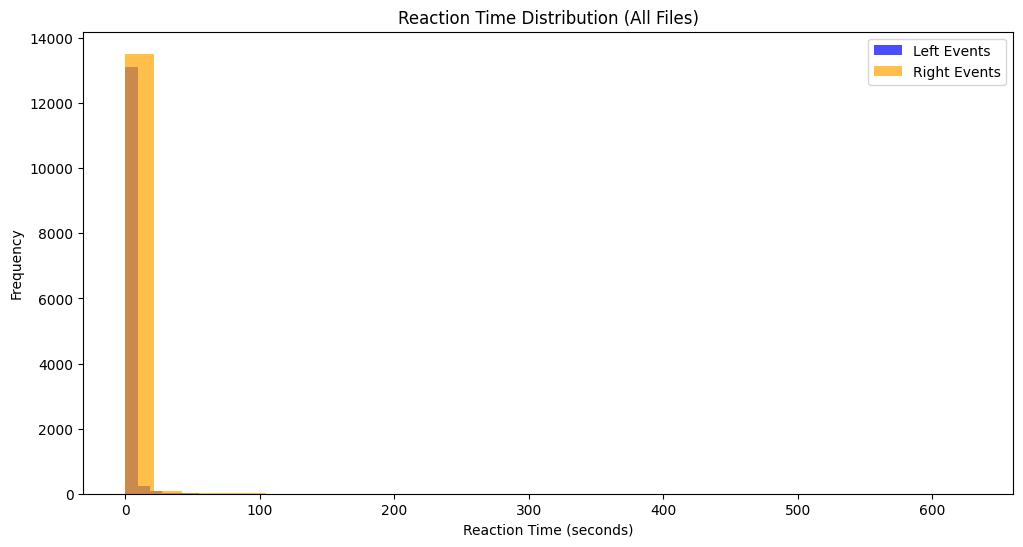

In [ ]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt

# Paths
dataset_dir = "/content/drive/MyDrive/EEGOut"  # Path containing .set files and .npy files
output_dir = "/content/drive/MyDrive/EegRtOut"  # Output directory for storing reaction times
os.makedirs(output_dir, exist_ok=True)

# Function to calculate reaction times
def calculate_reaction_times(deviation_events, response_events, sfreq):
    reaction_times = []
    missed_stimuli = []
    response_idx = 0  # Pointer for response events

    for dev_event in deviation_events:
        deviation_sample = dev_event[0]  # Sample index of deviation onset

        # Find the first response after the deviation onset
        while response_idx < len(response_events) and response_events[response_idx, 0] <= deviation_sample:
            response_idx += 1

        if response_idx < len(response_events):
            response_sample = response_events[response_idx, 0]
            reaction_time = (response_sample - deviation_sample) / sfreq
            reaction_times.append(reaction_time)
        else:
            missed_stimuli.append(deviation_sample)

    return reaction_times, missed_stimuli

# Iterate over all `.set` files
results = []  # Store results for all files
sfreq = 500  # Sampling frequency as per the paper

for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)

    # Check for the folder containing the deeply nested .set file
    if os.path.isdir(folder_path):
        # Traverse deeper to find the .set file
        nested_folder = os.path.join(folder_path, folder)
        if not os.path.isdir(nested_folder):
            print(f"Unexpected structure in {folder}. Skipping.")
            continue

        # Locate the .set file
        set_file = next((f for f in os.listdir(nested_folder) if f.endswith('.set')), None)
        if not set_file:
            print(f"No .set file found in {folder}. Skipping.")
            continue

        # Load the .set file
        set_file_path = os.path.join(nested_folder, set_file)
        raw = mne.io.read_raw_eeglab(set_file_path, preload=True)
        events, event_id = mne.events_from_annotations(raw)

        # Extract response events (253)
        response_events = events[events[:, 2] == event_id.get('253')]

        # Load pre-split left and right deviation events
        base_name = os.path.splitext(set_file)[0]
        left_npy_path = os.path.join(dataset_dir, f"{base_name}_left.npy")
        right_npy_path = os.path.join(dataset_dir, f"{base_name}_right.npy")

        if not (os.path.exists(left_npy_path) and os.path.exists(right_npy_path)):
            print(f"Missing .npy files for {base_name}. Skipping.")
            continue

        left_events = np.load(left_npy_path)
        right_events = np.load(right_npy_path)

        # Calculate reaction times for left and right events
        left_reaction_times, left_missed = calculate_reaction_times(left_events, response_events, sfreq)
        right_reaction_times, right_missed = calculate_reaction_times(right_events, response_events, sfreq)

        # Store results
        results.append({
            "file": base_name,
            "left_reaction_times": left_reaction_times,
            "right_reaction_times": right_reaction_times,
            "left_missed_stimuli": left_missed,
            "right_missed_stimuli": right_missed
        })

        print(f"Processed {base_name}: {len(left_reaction_times)} left reactions, {len(right_reaction_times)} right reactions")

# Save all results to a summary file
summary_file = os.path.join(output_dir, "reaction_times_summary.npy")
np.save(summary_file, results)
print("\nProcessing complete. Summary saved.")

# Example of visualizing reaction time distributions
left_times_all = [rt for r in results for rt in r['left_reaction_times']]
right_times_all = [rt for r in results for rt in r['right_reaction_times']]

plt.figure(figsize=(12, 6))
plt.hist(left_times_all, bins=30, alpha=0.7, label='Left Events', color='blue')
plt.hist(right_times_all, bins=30, alpha=0.7, label='Right Events', color='orange')
plt.xlabel('Reaction Time (seconds)')
plt.ylabel('Frequency')
plt.title('Reaction Time Distribution (All Files)')
plt.legend()
plt.show()


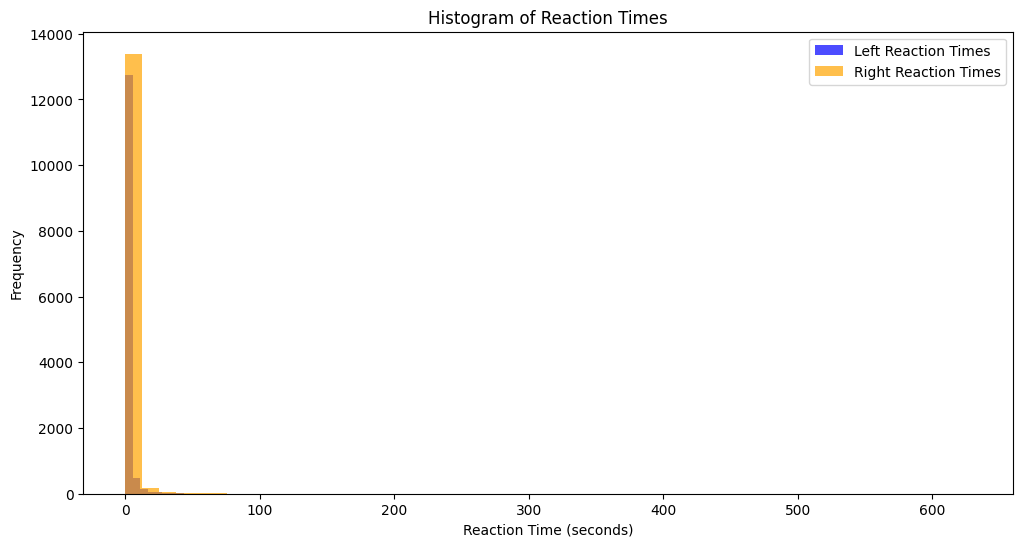

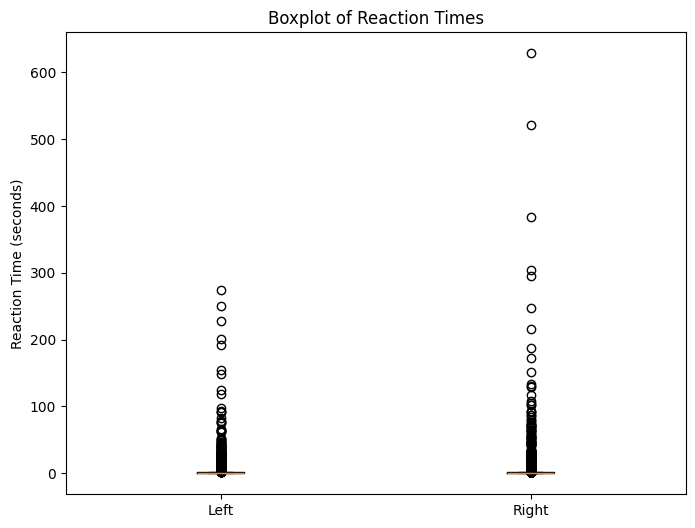

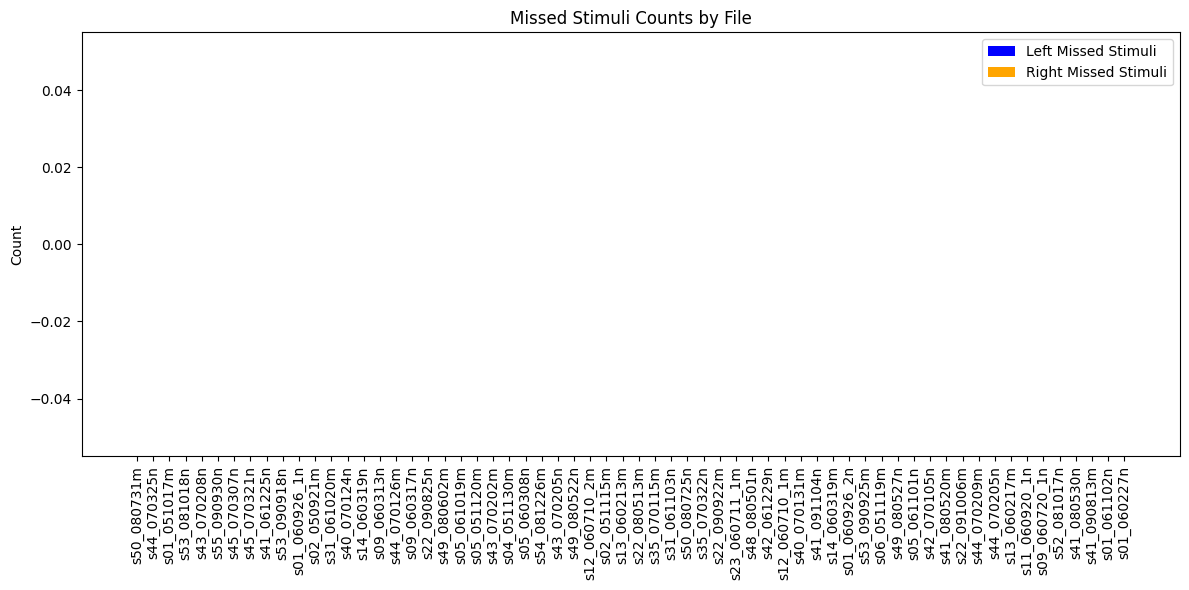

Mean Reaction Time (Left): 2.05 seconds
Mean Reaction Time (Right): 2.26 seconds


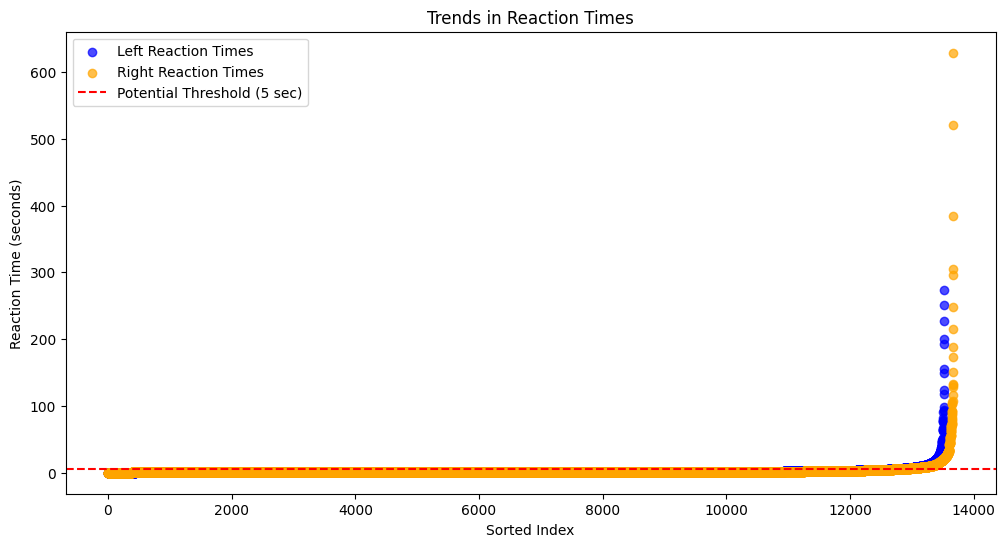

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load reaction times summary
summary_file = "/content/drive/MyDrive/EegRtOut/reaction_times_summary.npy"
results = np.load(summary_file, allow_pickle=True)

# Initialize data holders
left_reaction_times_all = []
right_reaction_times_all = []
left_missed_counts = []
right_missed_counts = []

# Aggregate data
for result in results:
    left_reaction_times_all.extend(result['left_reaction_times'])
    right_reaction_times_all.extend(result['right_reaction_times'])
    left_missed_counts.append(len(result['left_missed_stimuli']))
    right_missed_counts.append(len(result['right_missed_stimuli']))

# 1. Histogram of Reaction Times
plt.figure(figsize=(12, 6))
plt.hist(left_reaction_times_all, bins=50, alpha=0.7, label='Left Reaction Times', color='blue')
plt.hist(right_reaction_times_all, bins=50, alpha=0.7, label='Right Reaction Times', color='orange')
plt.xlabel('Reaction Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Reaction Times')
plt.legend()
plt.savefig("reaction_time_histogram.png")
plt.show()

# 2. Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([left_reaction_times_all, right_reaction_times_all], labels=['Left', 'Right'])
plt.title('Boxplot of Reaction Times')
plt.ylabel('Reaction Time (seconds)')
plt.savefig("reaction_time_boxplot.png")
plt.show()

# 3. Bar Plot of Missed Stimuli
labels = [result['file'] for result in results]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, left_missed_counts, width, label='Left Missed Stimuli', color='blue')
bar2 = ax.bar(x + width/2, right_missed_counts, width, label='Right Missed Stimuli', color='orange')

ax.set_ylabel('Count')
ax.set_title('Missed Stimuli Counts by File')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()
plt.tight_layout()
plt.savefig("missed_stimuli_barplot.png")
plt.show()

# 4. Mean Reaction Times
mean_left_reaction = np.mean(left_reaction_times_all)
mean_right_reaction = np.mean(right_reaction_times_all)

print(f"Mean Reaction Time (Left): {mean_left_reaction:.2f} seconds")
print(f"Mean Reaction Time (Right): {mean_right_reaction:.2f} seconds")

# 5. Trends and Outliers
plt.figure(figsize=(12, 6))
plt.scatter(range(len(left_reaction_times_all)), sorted(left_reaction_times_all), label='Left Reaction Times', alpha=0.7, color='blue')
plt.scatter(range(len(right_reaction_times_all)), sorted(right_reaction_times_all), label='Right Reaction Times', alpha=0.7, color='orange')
plt.axhline(y=5, color='red', linestyle='--', label='Potential Threshold (5 sec)')
plt.xlabel('Sorted Index')
plt.ylabel('Reaction Time (seconds)')
plt.title('Trends in Reaction Times')
plt.legend()
plt.savefig("reaction_time_trends.png")
plt.show()


Basic Statistics:
Mean Reaction Time: 2.15 seconds
Median Reaction Time: 0.96 seconds
Standard Deviation: 8.91 seconds


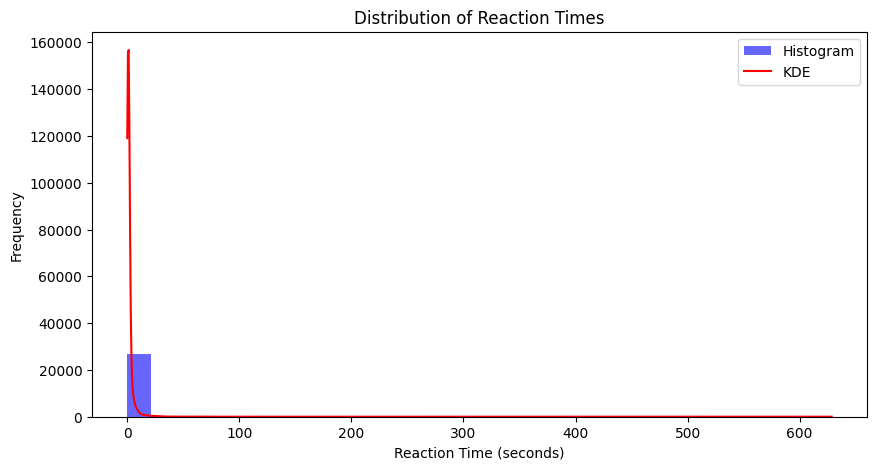

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Path to the saved reaction times summary
reaction_times_summary_path = "/content/drive/MyDrive/EegRtOut/reaction_times_summary.npy"

# Load the reaction times data
data = np.load(reaction_times_summary_path, allow_pickle=True)

# Extract left and right reaction times
left_reaction_times = [rt for r in data for rt in r['left_reaction_times']]
right_reaction_times = [rt for r in data for rt in r['right_reaction_times']]

# Combine both left and right reaction times for analysis
all_reaction_times = left_reaction_times + right_reaction_times

# Basic statistics
print("Basic Statistics:")
print(f"Mean Reaction Time: {np.mean(all_reaction_times):.2f} seconds")
print(f"Median Reaction Time: {np.median(all_reaction_times):.2f} seconds")
print(f"Standard Deviation: {np.std(all_reaction_times):.2f} seconds")

# Plot histogram and KDE
plt.figure(figsize=(10, 5))
plt.hist(all_reaction_times, bins=30, alpha=0.6, color='blue', label='Histogram')
kde = gaussian_kde(all_reaction_times)
x_vals = np.linspace(min(all_reaction_times), max(all_reaction_times), 1000)
plt.plot(x_vals, kde(x_vals) * len(all_reaction_times) * (max(all_reaction_times) - min(all_reaction_times)) / 30, color='red', label='KDE')
plt.xlabel('Reaction Time (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Reaction Times')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load the reaction times summary
reaction_times_summary = np.load("/content/drive/MyDrive/EegRtOut/reaction_times_summary.npy", allow_pickle=True)

# Extract reaction times and prepare labels
all_reaction_times = []
labels = []

for record in reaction_times_summary:
    left_reaction_times = record['left_reaction_times']
    right_reaction_times = record['right_reaction_times']

    # Combine left and right reaction times
    combined_reaction_times = left_reaction_times + right_reaction_times

    # Assign labels based on thresholds
    for rt in combined_reaction_times:
        all_reaction_times.append(rt)
        if rt <= 1:
            labels.append("Low")
        elif 1 < rt <= 5:
            labels.append("Medium")
        else:
            labels.append("High")

# Convert to DataFrame
data = pd.DataFrame({
    "Reaction_Time": all_reaction_times,
    "Fatigue_Level": labels
})

# Prepare features and labels for the model
X = data[["Reaction_Time"]]
y = data["Fatigue_Level"]

# Encode labels (Low: 0, Medium: 1, High: 2)
y = y.map({"Low": 0, "Medium": 1, "High": 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the model
joblib.dump(clf, "fatigue_classifier.pkl")
print("\nModel saved as 'fatigue_classifier.pkl'")


Confusion Matrix:
 [[2932    0    0]
 [   0 2141    0]
 [   0    0  366]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2932
           1       1.00      1.00      1.00      2141
           2       1.00      1.00      1.00       366

    accuracy                           1.00      5439
   macro avg       1.00      1.00      1.00      5439
weighted avg       1.00      1.00      1.00      5439


Model saved as 'fatigue_classifier.pkl'



Verifying dataset structure in: /content/drive/MyDrive/EEGOut
Total items found: 373

Sample of directory structure:
- /content/drive/MyDrive/EEGOut/
- /content/drive/MyDrive/EEGOut/s50_080731m.set
- /content/drive/MyDrive/EEGOut/s50_080731m.set/s50_080731m.set
- /content/drive/MyDrive/EEGOut/s50_080731m.set/s50_080731m.set/s50_080731m.fdt
- /content/drive/MyDrive/EEGOut/s50_080731m.set/s50_080731m.set/s50_080731m.set
- /content/drive/MyDrive/EEGOut/s50_080731m_left.npy
- /content/drive/MyDrive/EEGOut/s50_080731m_right.npy
- /content/drive/MyDrive/EEGOut/s44_070325n.set
- /content/drive/MyDrive/EEGOut/s44_070325n.set/s44_070325n.set
- /content/drive/MyDrive/EEGOut/s44_070325n.set/s44_070325n.set/s44_070325n.fdt

Total .set files found: 186

Sample .set files:
- /content/drive/MyDrive/EEGOut/s50_080731m.set
- /content/drive/MyDrive/EEGOut/s44_070325n.set
- /content/drive/MyDrive/EEGOut/s01_051017m.set
- /content/drive/MyDrive/EEGOut/s53_081018n.set
- /content/drive/MyDrive/EEGOut/s43_0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Effective window size : 2.000 (s)
Successfully processed participant s50_080731m
Processing participant s44_070325n
Reading /content/drive/MyDrive/EEGOut/s44_070325n.set/s44_070325n.set/s44_070325n.fdt
Reading 0 ... 3102199  =      0.000 ...  6204.398 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.6s


Effective window size : 2.000 (s)
Successfully processed participant s44_070325n
Processing participant s01_051017m
Reading /content/drive/MyDrive/EEGOut/s01_051017m.set/s01_051017m.set/s01_051017m.fdt
Reading 0 ... 1811359  =      0.000 ...  3622.718 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Effective window size : 2.000 (s)
Successfully processed participant s01_051017m
Processing participant s53_081018n
Reading /content/drive/MyDrive/EEGOut/s53_081018n.set/s53_081018n.set/s53_081018n.fdt
Reading 0 ... 1837779  =      0.000 ...  3675.558 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Effective window size : 2.000 (s)
Successfully processed participant s53_081018n
Processing participant s43_070208n
Reading /content/drive/MyDrive/EEGOut/s43_070208n.set/s43_070208n.set/s43_070208n.fdt
Reading 0 ... 2911699  =      0.000 ...  5823.398 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


Effective window size : 2.000 (s)
Successfully processed participant s43_070208n
Processing participant s55_090930n
Reading /content/drive/MyDrive/EEGOut/s55_090930n.set/s55_090930n.set/s55_090930n.fdt
Reading 0 ... 2705919  =      0.000 ...  5411.838 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.2s


Effective window size : 2.000 (s)
Successfully processed participant s55_090930n
Processing participant s45_070307n
Reading /content/drive/MyDrive/EEGOut/s45_070307n.set/s45_070307n.set/s45_070307n.fdt
Reading 0 ... 3267559  =      0.000 ...  6535.118 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


Effective window size : 2.000 (s)
Successfully processed participant s45_070307n
Processing participant s45_070321n
Reading /content/drive/MyDrive/EEGOut/s45_070321n.set/s45_070321n.set/s45_070321n.fdt
Reading 0 ... 2994979  =      0.000 ...  5989.958 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


Effective window size : 2.000 (s)
Successfully processed participant s45_070321n
Processing participant s41_061225n
Reading /content/drive/MyDrive/EEGOut/s41_061225n.set/s41_061225n.set/s41_061225n.fdt
Reading 0 ... 3176659  =      0.000 ...  6353.318 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


Effective window size : 2.000 (s)
Successfully processed participant s41_061225n
Processing participant s53_090918n
Reading /content/drive/MyDrive/EEGOut/s53_090918n.set/s53_090918n.set/s53_090918n.fdt
Reading 0 ... 2721679  =      0.000 ...  5443.358 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Effective window size : 2.000 (s)
Successfully processed participant s53_090918n
Processing participant s01_060926_1n
Reading /content/drive/MyDrive/EEGOut/s01_060926_1n.set/s01_060926_1n.set/s01_060926_1n.fdt
Reading 0 ... 2180519  =      0.000 ...  4361.038 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


Effective window size : 2.000 (s)
Successfully processed participant s01_060926_1n
Processing participant s02_050921m
Reading /content/drive/MyDrive/EEGOut/s02_050921m.set/s02_050921m.set/s02_050921m.fdt
Reading 0 ... 1814959  =      0.000 ...  3629.918 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Effective window size : 2.000 (s)
Successfully processed participant s02_050921m
Processing participant s31_061020m
Reading /content/drive/MyDrive/EEGOut/s31_061020m.set/s31_061020m.set/s31_061020m.fdt
Reading 0 ... 3530519  =      0.000 ...  7061.038 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.1s


Effective window size : 2.000 (s)
Successfully processed participant s31_061020m
Processing participant s40_070124n
Reading /content/drive/MyDrive/EEGOut/s40_070124n.set/s40_070124n.set/s40_070124n.fdt
Reading 0 ... 3233479  =      0.000 ...  6466.958 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.7s


Effective window size : 2.000 (s)
Successfully processed participant s40_070124n
Processing participant s14_060319n
Reading /content/drive/MyDrive/EEGOut/s14_060319n.set/s14_060319n.set/s14_060319n.fdt
Reading 0 ... 1639379  =      0.000 ...  3278.758 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Effective window size : 2.000 (s)
Successfully processed participant s14_060319n
Processing participant s09_060313n
Reading /content/drive/MyDrive/EEGOut/s09_060313n.set/s09_060313n.set/s09_060313n.fdt
Reading 0 ... 1948059  =      0.000 ...  3896.118 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Effective window size : 2.000 (s)
Successfully processed participant s09_060313n
Processing participant s44_070126m
Reading /content/drive/MyDrive/EEGOut/s44_070126m.set/s44_070126m.set/s44_070126m.fdt
Reading 0 ... 3122779  =      0.000 ...  6245.558 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.5s


Effective window size : 2.000 (s)
Successfully processed participant s44_070126m
Processing participant s09_060317n
Reading /content/drive/MyDrive/EEGOut/s09_060317n.set/s09_060317n.set/s09_060317n.fdt
Reading 0 ... 1309279  =      0.000 ...  2618.558 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Effective window size : 2.000 (s)
Successfully processed participant s09_060317n
Processing participant s22_090825n
Reading /content/drive/MyDrive/EEGOut/s22_090825n.set/s22_090825n.set/s22_090825n.fdt
Reading 0 ... 2882679  =      0.000 ...  5765.358 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Effective window size : 2.000 (s)
Successfully processed participant s22_090825n
Processing participant s49_080602m
Reading /content/drive/MyDrive/EEGOut/s49_080602m.set/s49_080602m.set/s49_080602m.fdt
Reading 0 ... 1813619  =      0.000 ...  3627.238 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Effective window size : 2.000 (s)
Successfully processed participant s49_080602m
Processing participant s05_061019m
Reading /content/drive/MyDrive/EEGOut/s05_061019m.set/s05_061019m.set/s05_061019m.fdt
Reading 0 ... 3157759  =      0.000 ...  6315.518 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


Effective window size : 2.000 (s)
Successfully processed participant s05_061019m
Processing participant s05_051120m
Reading /content/drive/MyDrive/EEGOut/s05_051120m.set/s05_051120m.set/s05_051120m.fdt
Reading 0 ... 1878659  =      0.000 ...  3757.318 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Effective window size : 2.000 (s)
Successfully processed participant s05_051120m
Processing participant s43_070202m
Reading /content/drive/MyDrive/EEGOut/s43_070202m.set/s43_070202m.set/s43_070202m.fdt
Reading 0 ... 3266619  =      0.000 ...  6533.238 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


Effective window size : 2.000 (s)
Successfully processed participant s43_070202m
Processing participant s04_051130m
Reading /content/drive/MyDrive/EEGOut/s04_051130m.set/s04_051130m.set/s04_051130m.fdt
Reading 0 ... 1878659  =      0.000 ...  3757.318 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Effective window size : 2.000 (s)
Successfully processed participant s04_051130m
Processing participant s05_060308n
Reading /content/drive/MyDrive/EEGOut/s05_060308n.set/s05_060308n.set/s05_060308n.fdt
Reading 0 ... 1848339  =      0.000 ...  3696.678 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Effective window size : 2.000 (s)
Successfully processed participant s05_060308n
Processing participant s54_081226m
Reading /content/drive/MyDrive/EEGOut/s54_081226m.set/s54_081226m.set/s54_081226m.fdt
Reading 0 ... 1230519  =      0.000 ...  2461.038 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Effective window size : 2.000 (s)
Successfully processed participant s54_081226m
Processing participant s43_070205n
Reading /content/drive/MyDrive/EEGOut/s43_070205n.set/s43_070205n.set/s43_070205n.fdt
Reading 0 ... 3287919  =      0.000 ...  6575.838 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.2s


Effective window size : 2.000 (s)
Successfully processed participant s43_070205n
Processing participant s49_080522n
Reading /content/drive/MyDrive/EEGOut/s49_080522n.set/s49_080522n.set/s49_080522n.fdt
Reading 0 ... 1511059  =      0.000 ...  3022.118 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Effective window size : 2.000 (s)
Successfully processed participant s49_080522n
Processing participant s12_060710_2m
Reading /content/drive/MyDrive/EEGOut/s12_060710_2m.set/s12_060710_2m.set/s12_060710_2m.fdt
Reading 0 ... 2105559  =      0.000 ...  4211.118 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Effective window size : 2.000 (s)
Successfully processed participant s12_060710_2m
Processing participant s02_051115m
Reading /content/drive/MyDrive/EEGOut/s02_051115m.set/s02_051115m.set/s02_051115m.fdt
Reading 0 ... 1916739  =      0.000 ...  3833.478 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Effective window size : 2.000 (s)
Successfully processed participant s02_051115m
Processing participant s13_060213m
Reading /content/drive/MyDrive/EEGOut/s13_060213m.set/s13_060213m.set/s13_060213m.fdt
Reading 0 ... 1917179  =      0.000 ...  3834.358 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Effective window size : 2.000 (s)
Successfully processed participant s13_060213m
Processing participant s22_080513m
Reading /content/drive/MyDrive/EEGOut/s22_080513m.set/s22_080513m.set/s22_080513m.fdt
Reading 0 ... 1950079  =      0.000 ...  3900.158 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Effective window size : 2.000 (s)
Successfully processed participant s22_080513m
Processing participant s35_070115m
Reading /content/drive/MyDrive/EEGOut/s35_070115m.set/s35_070115m.set/s35_070115m.fdt
Reading 0 ... 3257579  =      0.000 ...  6515.158 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


Effective window size : 2.000 (s)
Successfully processed participant s35_070115m
Processing participant s31_061103n
Reading /content/drive/MyDrive/EEGOut/s31_061103n.set/s31_061103n.set/s31_061103n.fdt
Reading 0 ... 3115539  =      0.000 ...  6231.078 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


Effective window size : 2.000 (s)
Successfully processed participant s31_061103n
Processing participant s50_080725n
Reading /content/drive/MyDrive/EEGOut/s50_080725n.set/s50_080725n.set/s50_080725n.fdt
Reading 0 ... 1849379  =      0.000 ...  3698.758 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Effective window size : 2.000 (s)
Successfully processed participant s50_080725n
Processing participant s35_070322n
Reading /content/drive/MyDrive/EEGOut/s35_070322n.set/s35_070322n.set/s35_070322n.fdt
Reading 0 ... 2983999  =      0.000 ...  5967.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.5s


Effective window size : 2.000 (s)
Successfully processed participant s35_070322n
Processing participant s22_090922m
Reading /content/drive/MyDrive/EEGOut/s22_090922m.set/s22_090922m.set/s22_090922m.fdt
Reading 0 ... 2749539  =      0.000 ...  5499.078 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Effective window size : 2.000 (s)
Successfully processed participant s22_090922m
Processing participant s23_060711_1m
Reading /content/drive/MyDrive/EEGOut/s23_060711_1m.set/s23_060711_1m.set/s23_060711_1m.fdt
Reading 0 ... 2110419  =      0.000 ...  4220.838 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Effective window size : 2.000 (s)
Successfully processed participant s23_060711_1m
Processing participant s48_080501n
Reading /content/drive/MyDrive/EEGOut/s48_080501n.set/s48_080501n.set/s48_080501n.fdt
Reading 0 ... 1808559  =      0.000 ...  3617.118 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Effective window size : 2.000 (s)
Successfully processed participant s48_080501n
Processing participant s42_061229n
Reading /content/drive/MyDrive/EEGOut/s42_061229n.set/s42_061229n.set/s42_061229n.fdt
Reading 0 ... 1344039  =      0.000 ...  2688.078 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Effective window size : 2.000 (s)
Successfully processed participant s42_061229n
Processing participant s12_060710_1m
Reading /content/drive/MyDrive/EEGOut/s12_060710_1m.set/s12_060710_1m.set/s12_060710_1m.fdt
Reading 0 ... 2117619  =      0.000 ...  4235.238 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Effective window size : 2.000 (s)
Successfully processed participant s12_060710_1m
Processing participant s40_070131m
Reading /content/drive/MyDrive/EEGOut/s40_070131m.set/s40_070131m.set/s40_070131m.fdt
Reading 0 ... 3281099  =      0.000 ...  6562.198 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.4s


Effective window size : 2.000 (s)
Successfully processed participant s40_070131m
Processing participant s41_091104n
Reading /content/drive/MyDrive/EEGOut/s41_091104n.set/s41_091104n.set/s41_091104n.fdt
Reading 0 ... 2721899  =      0.000 ...  5443.798 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Effective window size : 2.000 (s)
Successfully processed participant s41_091104n
Processing participant s14_060319m
Reading /content/drive/MyDrive/EEGOut/s14_060319m.set/s14_060319m.set/s14_060319m.fdt
Reading 0 ... 1427059  =      0.000 ...  2854.118 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Effective window size : 2.000 (s)
Successfully processed participant s14_060319m
Processing participant s01_060926_2n
Reading /content/drive/MyDrive/EEGOut/s01_060926_2n.set/s01_060926_2n.set/s01_060926_2n.fdt
Reading 0 ... 1927019  =      0.000 ...  3854.038 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Effective window size : 2.000 (s)
Successfully processed participant s01_060926_2n
Processing participant s53_090925m
Reading /content/drive/MyDrive/EEGOut/s53_090925m.set/s53_090925m.set/s53_090925m.fdt
Reading 0 ... 2707599  =      0.000 ...  5415.198 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


Effective window size : 2.000 (s)
Successfully processed participant s53_090925m
Processing participant s06_051119m
Reading /content/drive/MyDrive/EEGOut/s06_051119m.set/s06_051119m.set/s06_051119m.fdt
Reading 0 ... 1836479  =      0.000 ...  3672.958 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Effective window size : 2.000 (s)
Successfully processed participant s06_051119m
Processing participant s49_080527n
Reading /content/drive/MyDrive/EEGOut/s49_080527n.set/s49_080527n.set/s49_080527n.fdt
Reading 0 ... 1912919  =      0.000 ...  3825.838 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Effective window size : 2.000 (s)
Successfully processed participant s49_080527n
Processing participant s05_061101n
Reading /content/drive/MyDrive/EEGOut/s05_061101n.set/s05_061101n.set/s05_061101n.fdt
Reading 0 ... 3296099  =      0.000 ...  6592.198 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.8s


Effective window size : 2.000 (s)
Successfully processed participant s05_061101n
Processing participant s42_070105n
Reading /content/drive/MyDrive/EEGOut/s42_070105n.set/s42_070105n.set/s42_070105n.fdt
Reading 0 ... 3257439  =      0.000 ...  6514.878 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


Effective window size : 2.000 (s)
Successfully processed participant s42_070105n
Processing participant s41_080520m
Reading /content/drive/MyDrive/EEGOut/s41_080520m.set/s41_080520m.set/s41_080520m.fdt
Reading 0 ... 1910619  =      0.000 ...  3821.238 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Effective window size : 2.000 (s)
Successfully processed participant s41_080520m
Processing participant s22_091006m
Reading /content/drive/MyDrive/EEGOut/s22_091006m.set/s22_091006m.set/s22_091006m.fdt
Reading 0 ... 2715419  =      0.000 ...  5430.838 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Effective window size : 2.000 (s)
Successfully processed participant s22_091006m
Processing participant s44_070209m
Reading /content/drive/MyDrive/EEGOut/s44_070209m.set/s44_070209m.set/s44_070209m.fdt
Reading 0 ... 3407679  =      0.000 ...  6815.358 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.8s


Effective window size : 2.000 (s)
Successfully processed participant s44_070209m
Processing participant s44_070205n
Reading /content/drive/MyDrive/EEGOut/s44_070205n.set/s44_070205n.set/s44_070205n.fdt
Reading 0 ... 3199959  =      0.000 ...  6399.918 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


Effective window size : 2.000 (s)
Successfully processed participant s44_070205n
Processing participant s13_060217m
Reading /content/drive/MyDrive/EEGOut/s13_060217m.set/s13_060217m.set/s13_060217m.fdt
Reading 0 ... 1770099  =      0.000 ...  3540.198 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Effective window size : 2.000 (s)
Successfully processed participant s13_060217m
Processing participant s11_060920_1n
Reading /content/drive/MyDrive/EEGOut/s11_060920_1n.set/s11_060920_1n.set/s11_060920_1n.fdt
Reading 0 ... 1934619  =      0.000 ...  3869.238 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Effective window size : 2.000 (s)
Successfully processed participant s11_060920_1n
Processing participant s09_060720_1n
Reading /content/drive/MyDrive/EEGOut/s09_060720_1n.set/s09_060720_1n.set/s09_060720_1n.fdt
Reading 0 ... 1740439  =      0.000 ...  3480.878 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Effective window size : 2.000 (s)
Successfully processed participant s09_060720_1n
Processing participant s52_081017n
Reading /content/drive/MyDrive/EEGOut/s52_081017n.set/s52_081017n.set/s52_081017n.fdt
Reading 0 ... 1685479  =      0.000 ...  3370.958 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Effective window size : 2.000 (s)
Successfully processed participant s52_081017n
Processing participant s41_080530n
Reading /content/drive/MyDrive/EEGOut/s41_080530n.set/s41_080530n.set/s41_080530n.fdt
Reading 0 ... 1887039  =      0.000 ...  3774.078 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


Effective window size : 2.000 (s)
Successfully processed participant s41_080530n
Processing participant s41_090813m
Reading /content/drive/MyDrive/EEGOut/s41_090813m.set/s41_090813m.set/s41_090813m.fdt
Reading 0 ... 2873199  =      0.000 ...  5746.398 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Effective window size : 2.000 (s)
Successfully processed participant s41_090813m
Processing participant s01_061102n
Reading /content/drive/MyDrive/EEGOut/s01_061102n.set/s01_061102n.set/s01_061102n.fdt
Reading 0 ... 3152139  =      0.000 ...  6304.278 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.5s


Effective window size : 2.000 (s)
Successfully processed participant s01_061102n
Processing participant s01_060227n
Reading /content/drive/MyDrive/EEGOut/s01_060227n.set/s01_060227n.set/s01_060227n.fdt
Reading 0 ... 1779279  =      0.000 ...  3558.558 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Effective window size : 2.000 (s)
Successfully processed participant s01_060227n

Final dataset shape: X: (62, 6), y: (62,)
Successfully processed 62 participants

Model Evaluation:
Confusion Matrix:
 [[ 4  0  0]
 [ 0  4  1]
 [ 0  0 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.80      0.89         5
           2       0.91      1.00      0.95        10

    accuracy                           0.95        19
   macro avg       0.97      0.93      0.95        19
weighted avg       0.95      0.95      0.95        19


Model saved to /content/drive/MyDrive/FatigueModel/fatigue_classifier.pkl


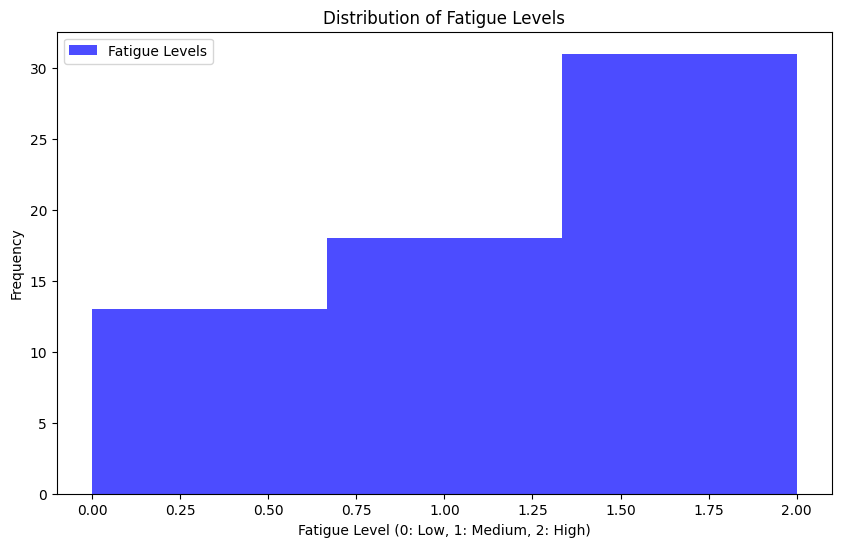

In [ ]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import glob

# EEG Bands definition
ebands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30)
}

# Sampling frequency
sfreq = 500

def verify_dataset_structure(dataset_dir):
    """Verify and print details about the dataset directory structure"""
    print(f"\nVerifying dataset structure in: {dataset_dir}")

    if not os.path.exists(dataset_dir):
        print(f"Error: Dataset directory does not exist: {dataset_dir}")
        return False

    all_items = glob.glob(os.path.join(dataset_dir, "**"), recursive=True)
    print(f"Total items found: {len(all_items)}")
    print("\nSample of directory structure:")
    for item in all_items[:10]:
        print(f"- {item}")

    set_files = glob.glob(os.path.join(dataset_dir, "**", "*.set"), recursive=True)
    print(f"\nTotal .set files found: {len(set_files)}")
    if set_files:
        print("\nSample .set files:")
        for f in set_files[:5]:
            print(f"- {f}")

    return len(set_files) > 0

def calculate_baselines_and_normalize(reaction_times):
    """Calculate baselines and normalize reaction times"""
    baselines = []
    normalized_data = []

    for participant in reaction_times:
        left_times = np.array(participant['left_reaction_times'])
        right_times = np.array(participant['right_reaction_times'])

        left_baseline = np.mean(left_times[:10]) if len(left_times) >= 10 else np.mean(left_times)
        right_baseline = np.mean(right_times[:10]) if len(right_times) >= 10 else np.mean(right_times)

        normalized_left = left_times / left_baseline
        normalized_right = right_times / right_baseline

        baselines.append({'participant': participant['file'], 'left_baseline': left_baseline, 'right_baseline': right_baseline})
        normalized_data.append({'participant': participant['file'], 'left_normalized': normalized_left, 'right_normalized': normalized_right})

    return baselines, normalized_data

def extract_eeg_features(file_path, ebands, sfreq):
    """Extract EEG features from .set file"""
    try:
        # Read the EEG data
        raw = mne.io.read_raw_eeglab(file_path, preload=True)

        # Apply bandpass filter
        raw.filter(0.5, 30)

        # Calculate power spectral density using Welch's method
        # Using raw.compute_psd() for newer MNE versions
        try:
            spectrum = raw.compute_psd(
                method='welch',
                fmin=0.5,
                fmax=30,
                n_fft=sfreq * 2,
                n_overlap=sfreq,
                average='mean'
            )
            psds = spectrum.get_data()
            freqs = spectrum.freqs
        except AttributeError:
            # Fallback for older MNE versions
            from mne.time_frequency import psd_welch
            psds, freqs = psd_welch(raw, fmin=0.5, fmax=30, n_fft=sfreq * 2)

        # Calculate band powers
        features = {}
        for band, (fmin, fmax) in ebands.items():
            freq_mask = (freqs >= fmin) & (freqs <= fmax)
            band_power = psds[:, freq_mask].mean(axis=1)
            features[band] = band_power.mean()

        return features

    except Exception as e:
        print(f"Error in extract_eeg_features for {file_path}: {str(e)}")
        return None

def find_set_file(dataset_dir, participant_id):
    """Find .set file for a participant using the specific nested structure"""
    expected_path = os.path.join(dataset_dir,
                                f"{participant_id}.set",
                                f"{participant_id}.set",
                                f"{participant_id}.set")
    if os.path.exists(expected_path):
        return expected_path
    return None

def main():
    # Paths
    dataset_dir = "/content/drive/MyDrive/EEGOut"
    reaction_time_file = "/content/drive/MyDrive/EegRtOut/reaction_times_summary.npy"
    output_dir = "/content/drive/MyDrive/FatigueModel"
    os.makedirs(output_dir, exist_ok=True)

    # Verify dataset structure
    if not verify_dataset_structure(dataset_dir):
        print("Dataset structure verification failed. Please check the paths and structure.")
        return

    # Load and process reaction times
    reaction_times = np.load(reaction_time_file, allow_pickle=True)
    print(f"\nLoaded Reaction Times: {len(reaction_times)} participants")

    baselines, normalized_data = calculate_baselines_and_normalize(reaction_times)
    print(f"Baselines calculated for {len(baselines)} participants")

    # Process each participant
    X = []
    y = []
    processed_participants = 0

    for participant in normalized_data:
        participant_id = participant['participant']
        set_file_path = find_set_file(dataset_dir, participant_id)

        if not set_file_path:
            print(f"Could not find .set file for participant {participant_id}")
            continue

        print(f"Processing participant {participant_id}")

        try:
            eeg_features = extract_eeg_features(set_file_path, ebands, sfreq)
            if not eeg_features:
                print(f"Failed to extract features for participant {participant_id}")
                continue

            left_norm = participant['left_normalized'].mean()
            right_norm = participant['right_normalized'].mean()

            if left_norm > 2.5 or right_norm > 2.5:
                fatigue_level = 2
            elif left_norm > 1.5 or right_norm > 1.5:
                fatigue_level = 1
            else:
                fatigue_level = 0

            features = list(eeg_features.values()) + [left_norm, right_norm]
            X.append(features)
            y.append(fatigue_level)
            processed_participants += 1
            print(f"Successfully processed participant {participant_id}")

        except Exception as e:
            print(f"Error processing participant {participant_id}: {str(e)}")
            continue

    if processed_participants > 0:
        X = np.array(X)
        y = np.array(y)

        print(f"\nFinal dataset shape: X: {X.shape}, y: {y.shape}")
        print(f"Successfully processed {processed_participants} participants")

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model = GradientBoostingClassifier()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        print("\nModel Evaluation:")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("\nClassification Report:\n", classification_report(y_test, y_pred))

        model_file = os.path.join(output_dir, "fatigue_classifier.pkl")
        with open(model_file, 'wb') as f:
            pickle.dump(model, f)
        print(f"\nModel saved to {model_file}")

        plt.figure(figsize=(10, 6))
        plt.hist(y, bins=3, alpha=0.7, color='blue', label='Fatigue Levels')
        plt.xlabel('Fatigue Level (0: Low, 1: Medium, 2: High)')
        plt.ylabel('Frequency')
        plt.title('Distribution of Fatigue Levels')
        plt.legend()
        plt.show()
    else:
        print("No participants were successfully processed. Please check the data and paths.")

if __name__ == "__main__":
    main()

In [ ]:
# Data Acquisition and Buffering
class EEGBuffer:
    def __init__(self, buffer_size=500):  # 1 second at 500Hz
        self.buffer_size = buffer_size
        self.eeg_buffer = []
        self.features_buffer = []

    def add_sample(self, eeg_sample):
        """Add new EEG sample and maintain buffer size"""
        self.eeg_buffer.append(eeg_sample)
        if len(self.eeg_buffer) > self.buffer_size:
            self.eeg_buffer.pop(0)

In [ ]:
# Real-time Feature Extraction
def extract_realtime_features(eeg_buffer):
    """Extract features from the current EEG buffer"""
    # Calculate band powers using sliding window
    features = {
        'delta': compute_bandpower(eeg_buffer, 0.5, 4, 500),
        'theta': compute_bandpower(eeg_buffer, 4, 8, 500),
        'alpha': compute_bandpower(eeg_buffer, 8, 12, 500),
        'beta': compute_bandpower(eeg_buffer, 12, 30, 500),
        'rt_left': current_reaction_time_left,
        'rt_right': current_reaction_time_right
    }
    return features

In [ ]:
# Continuous Prediction Pipeline
class RealtimeFatigueDetector:
    def __init__(self, model_path, scaler_path):
        self.model = load_model(model_path)
        self.scaler = load_scaler(scaler_path)
        self.eeg_buffer = EEGBuffer()

    def process_sample(self, eeg_sample, rt_data):
        # Add new sample to buffer
        self.eeg_buffer.add_sample(eeg_sample)

        # Extract features when buffer is full
        if len(self.eeg_buffer) == self.eeg_buffer.buffer_size:
            features = extract_realtime_features(self.eeg_buffer)

            # Scale features
            features_scaled = self.scaler.transform([features])

            # Make prediction
            prediction = self.model.predict(features_scaled)[0]
            probability = self.model.predict_proba(features_scaled)[0]

            return {
                'fatigue_level': prediction,
                'confidence': probability,
                'eeg_features': features
            }

In [ ]:
# Alert Generation
def generate_alerts(prediction_result):
    """Generate alerts based on fatigue prediction"""
    fatigue_level = prediction_result['fatigue_level']
    confidence = prediction_result['confidence']

    if fatigue_level == 2 and confidence[2] > 0.8:
        return {
            'level': 'HIGH',
            'message': 'High fatigue detected! Please take a break.',
            'action_required': True
        }
    elif fatigue_level == 1 and confidence[1] > 0.7:
        return {
            'level': 'MEDIUM',
            'message': 'Moderate fatigue detected. Stay alert.',
            'action_required': False
        }
    return {
        'level': 'LOW',
        'message': 'Normal alertness levels.',
        'action_required': False
    }